In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px
from matplotlib import cm
import matplotlib as mpl
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy
import random
import xarray as xr
import itertools
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn import tree
from sklearn.model_selection import cross_validate
import geopandas as gpd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from pathos.threading import ThreadPool as Pool
from sklearn import datasets, linear_model
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [1]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
The scikit-learn version is 1.0.1.


In [2]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")
fig_dir=Path('/mnt/c/Users/fransjevanoors/surfdrive - Fransje van Oorschot@surfdrive.surf.nl/Fransje/global_SR/global_sr_paper/figures')

In [3]:
data_sources = 'gswp-p_gleam-ep_gswp-t'

In [4]:
# performance metrics
def rmse(y,y_pred):
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    return rmse

def r2_adj(y,y_pred,features):
    r2 = r2_score(y, y_pred)
    r2_adj = 1-(((1-r2)*(len(y)-1))/(len(y)-len(features)-1))
    return r2_adj

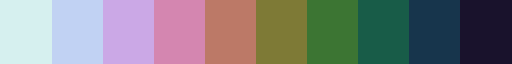

In [5]:
cmap = cm.get_cmap('cubehelix_r', 12)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cmap_sr = ListedColormap(color_list[1:-1])
cmap_sr.set_over(color_list[-1])
cmap_sr.set_under(color_list[0])
cmap_sr.set_bad('lightgrey')
cmap_sr

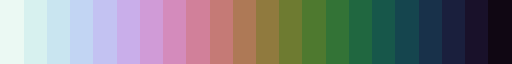

In [6]:
cmap = cm.get_cmap('cubehelix_r', 24)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cmap_sr = ListedColormap(color_list[1:-1])
cmap_sr.set_over(color_list[-1])
cmap_sr.set_under(color_list[0])
cmap_sr.set_bad('lightgrey')
cmap_sr

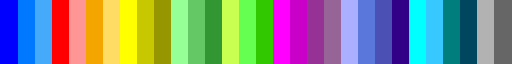

In [7]:
c1= [0/255,0/255,255/255]
c2= [0/255, 120/255,255/255]
c3= [70/255, 170/255, 250/255]
c4= [255/255,0/255,0/255]
c5= [255/255, 150/255, 150/255]
c6= [245/255, 165/255,0/255]
c7= [255/255, 220/255, 100/255]
c8= [255/255,255/255,0/255]
c9= [200/255, 200/255,0/255]
c10= [150/255, 150/255,0/255]
c11= [150/255,255/255, 150/255]
c12= [100/255, 200/255, 100/255]
c13= [50/255, 150/255 ,50/255]
c14= [200/255,255/255, 80/255]
c15= [100/255,255/255, 80/255]
c16= [50/255, 200/255,0/255]
c17= [255/255,0/255,255/255]
c18= [200/255,0/255 ,200/255]
c19= [150/255, 50/255 ,150/255]
c20= [150/255, 100/255 ,150/255]
c21= [170/255, 175/255 ,255/255]
c22= [90/255, 120/255 ,220/255]
c23= [75/255, 80/255, 180/255]
c24= [50/255 ,0/255, 135/255]
c25= [0/255 ,255/255,255/255]
c26= [55/255 ,200/255,255/255]
c27= [0/255 ,125/255, 125/255]
c28= [0/255, 70/255, 95/255]
c29= [178/255 ,178/255, 178/255]
c30= [102/255, 102/255, 102/255]

colors=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30]
cm_kg = ListedColormap(colors)
cm_kg

## 0. plot Sr

3612


Text(0.5, 1.0, '')

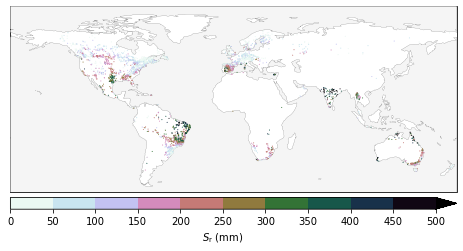

In [10]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_v2.csv',index_col=0)
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
df = df[['lat','lon','sr_20']]
cmap_vd2 = cmap_sr
print(len(df))

bounds = np.linspace(0,500,11)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,s=0.8,c=df['sr_20'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1,zorder=101)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ (mm)', size=10)
ax.set_title('',size=14)
# fig.savefig(f'{fig_dir}/sr_map_t20.jpg',bbox_inches='tight',dpi=600)

## 1. CORRELATION MATRIX

In [11]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    # cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    # cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False,labelsize=17)

    # Rotate the tick labels and set their alignment.
    # plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
    #          rotation_mode="anchor")
    
    plt.setp(ax.get_xticklabels(), rotation=30, ha="center", rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    # ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [12]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t_v2.csv'
df = pd.read_csv(f,index_col=0)
df = df.drop(columns=['stext','start_year','end_year','years','kg','lat','lon'])
df = df.drop(columns=['idu_mean_l', 'idu_max_l', 'hpd_mean_l',
       'hpd_max_l', 'hpf_l', 'lpf_l', 'si_pl', 'phi_l', 'de_l', 'dp_l', 'dt_l',
       'sp_l', 'st_l', 'se_l', 'sd_l', 'sti_l', 'asi_l','ppd_l'])
df = df.drop(columns=['sti','area'])
df = df.drop(columns=['q_mean'])
df = df.dropna()
corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr.style.background_gradient(cmap='coolwarm').set_precision(2).to_excel(f'{work_dir}/output/regression/correlation_matrix.xlsx')

/tmp/ipykernel_237/392442107.py:12: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2).to_excel(f'{work_dir}/output/regression/correlation_matrix.xlsx')


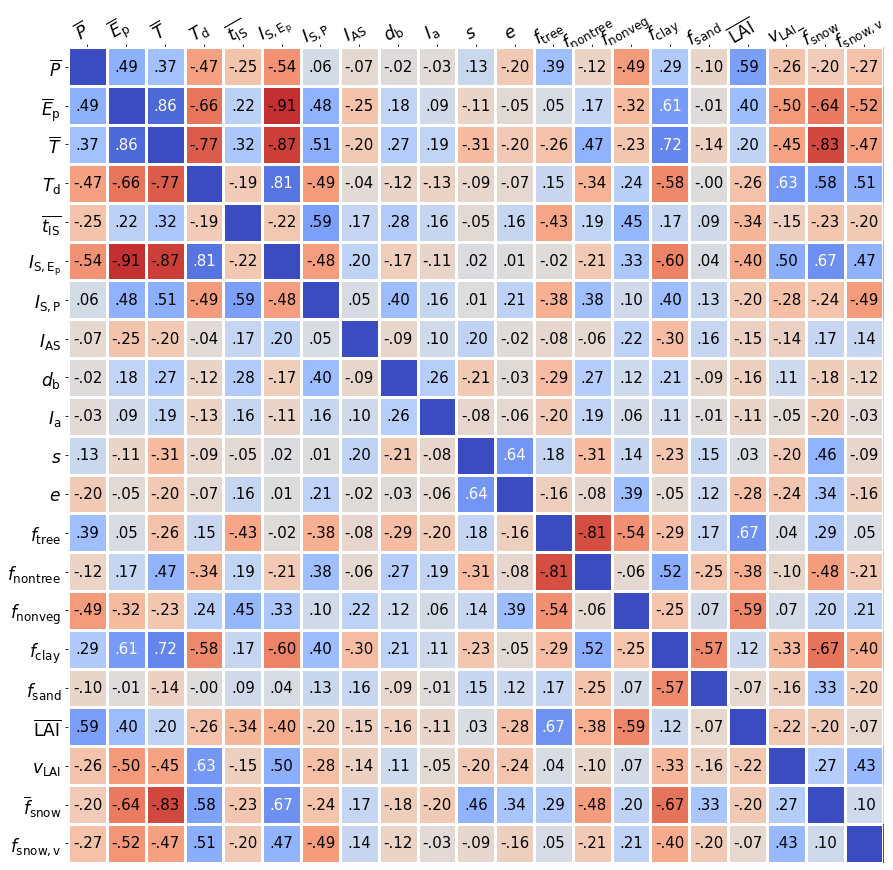

In [13]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
features = ['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd']
df = df[features]
df = df.dropna()
df = df.rename(columns={'idu_mean':'$\overline{t_\mathrm{IS}}$','tdiff_mean':'$T_{\mathrm{d}}$','t_mean':'$\overline{T}$', 'asi':'$I_{\mathrm{AS}}$','p_mean':'$\overline{P}$','si_p':'$I_{\mathrm{S,P}}$','ep_mean':'$\overline{E}_\mathrm{p}$',
                    'sc_mean':'$\overline{f}_{\mathrm{snow}}$','pclay':'$f_{\mathrm{clay}}$','slp_mean':'$s$','lai_mean':'$\overline{\mathrm{LAI}}$','ntc':'$f_{\mathrm{nontree}}$','dtb':'$d_{\mathrm{b}}$','si_ep':'$I_{\mathrm{S,E_p}}$',
                        'lai_rsd':'$v_\mathrm{LAI}$','nonveg':'$f_{\mathrm{nonveg}}$','el_mean':'$e$','psand':'$f_{\mathrm{sand}}$','sc_rsd':'$f_{\mathrm{snow,v}}$','tc':'$f_{\mathrm{tree}}$','ia':'$I_\mathrm{a}$'})
xl = df.columns
yl = df.columns

corr = df.corr()
fig, ax = plt.subplots(1,1,figsize=(15,15))
im = heatmap(corr, xl,yl, ax=ax,
                cmap="coolwarm_r", vmin=-1, vmax=1)

def func(x, pos):
    return f"{x:.2f}".replace("0.", ".").replace("1.00", "")

annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func),threshold=0.6, size=15)
plt.show()
fig.savefig(f'{fig_dir}/corrmatrix_21variables.jpg',bbox_inches='tight',dpi=600)

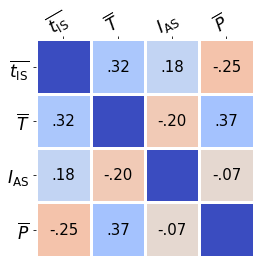

In [14]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
features = ['idu_mean', 't_mean','asi','p_mean']
df = df[features]
df = df.dropna()
df = df.rename(columns={'idu_mean':'$\overline{t_\mathrm{IS}}$','t_mean':'$\overline{T}$', 'asi':'$I_{\mathrm{AS}}$','p_mean':'$\overline{P}$'})

xl = df.columns
yl = df.columns

corr = df.corr()
fig, ax = plt.subplots(1,1,figsize=(4,4))
im = heatmap(corr, xl,yl, ax=ax,
                cmap="coolwarm_r", vmin=-1, vmax=1)

def func(x, pos):
    return f"{x:.2f}".replace("0.", ".").replace("1.00", "")

annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func),threshold=0.6, size=15)
plt.show()
fig.savefig(f'{fig_dir}/corrmatrix_4variables.jpg',bbox_inches='tight',dpi=600)

# Process hyper parameter tuning results

In [104]:
dfs=[]
for i in range(5):
    df = pd.read_csv(f'{work_dir}/output/cross_validation/output/sdf_kinner5_kouter5_var22_v2_fold{i}_test.csv')
    dfs.append(df)
dd = pd.concat(dfs)
dd['fold'] = dd['fold']+1
dd.index = dd.fold
dd = dd.rename(columns={'Unnamed: 0':'Rank', 'n_estimators':'nt','max_depth':'dmax','min_samples_leaf':'lmin',
                       'train_mae':'Train MAD','test_mae':'Test MAD','n_train':'n train','n_test':'n test'})
dd['Rank'] = dd['Rank']+1
dd = dd.drop(columns=['max_features','train_r2_adj','test_r2_adj','fold'])

In [105]:
dd

Rank   nt  dmax  lmin  Train MAD  Test MAD  n train  n test
fold                                                             
1        1  400   NaN     1      13.60     36.66     2555     639
1        2  200   NaN     1      13.71     36.76     2555     639
1        3  100   NaN     1      13.90     36.94     2555     639
2        1  400   NaN     1      13.69     37.16     2555     639
2        2  200   NaN     1      13.77     37.18     2555     639
2        3  100   NaN     1      13.94     37.62     2555     639
3        1  400   NaN     1      13.89     37.07     2555     639
3        2  200   NaN     1      13.99     37.25     2555     639
3        3  100   NaN     1      14.03     37.38     2555     639
4        1  400   NaN     1      13.75     37.01     2555     639
4        2  200   NaN     1      13.78     37.07     2555     639
4        3  100   NaN     1      13.92     37.23     2555     639
5        1  400   NaN     1      13.95     36.54     2556     638
5        2  200   NaN     1      14.00     36.76     2556     638
5        3  100   NaN     1      14.11     36.75     2556     638

In [ ]:
# 'n_estimators':[100,200,400],'max_depth':[5,10,None],'min_samples_leaf':[1,5,10]}

# MODEL A

In [190]:
mod = 'modela'

In [191]:
#Europe
lat_min_e, lat_max_e = 35,72 # 36,46 only spain cluster
lon_min_e, lon_max_e = -12,29 # -10,5 only spain cluster

#Asia
lat_min_a, lat_max_a = 8,26
lon_min_a, lon_max_a = 68,105

#us
lat_min_u, lat_max_u = 22,62
lon_min_u, lon_max_u = -132,-55

#south america
lat_min_s, lat_max_s = -32,-4
lon_min_s, lon_max_s = -60,-32

#south africa
lat_min_f, lat_max_f = -36,-17
lon_min_f, lon_max_f = 12,36

#australia
lat_min_t, lat_max_t = -40,-25
lon_min_t, lon_max_t = 140,155

### cross validation

In [192]:
max_depth=None
min_samples_leaf=1

In [182]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_v2.csv',index_col=0)
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
df['catch_id'] = df.index
features = ['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_rsd','sc_mean']
sr_rp = 'sr_20'
ll = ['lat','lon','catch_id']
f = features + ll
dfx = df[f].values
dfy = df[sr_rp].values

# here split dataset into 'temp' and 'test'
cv_outer = 5 # the number of outer cross validations
sdf = pd.DataFrame(index=range(cv_outer), columns=['n_estimators','max_depth','min_samples_leaf','max_features','train_mae','train_r2_adj','test_mae','test_r2_adj','train_r2','test_r2','n_train','n_test','fold'])
l = []
train_dfs=[]
test_dfs=[]

kf = KFold(n_splits=cv_outer,shuffle=True,random_state=0)
df = dfy.reshape(-1, 1).ravel()
i=0
cv_train_ix = []
cv_test_ix = []
ddl = []
for train_ix, test_ix in kf.split(dfx):
    cv_train_ix.append(train_ix)
    cv_test_ix.append(test_ix)
    X = dfx[train_ix]
    y = dfy[train_ix]
    X_test = dfx[test_ix]
    y_test = dfy[test_ix] 
    
    # save lat lon columns
    lat_train = X[:,-3]
    lon_train = X[:,-2]
    lat_test = X_test[:,-3]
    lon_test = X_test[:,-2]
    catch_id_train = X[:,-1]
    catch_id_test = X_test[:,-1]

    # remove lat lon catchid columns
    X = np.delete(X,-1,1)
    X = np.delete(X,-1,1)
    X = np.delete(X,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)  
    
    # run rf model with full 'temp' set and test set using the best inner cross validation
    rf = RandomForestRegressor(criterion='absolute_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    rf.fit(X,y)
    test_y_pred = rf.predict(X_test)
    train_y_pred = rf.predict(X)
    n_train,n_test = len(y),len(y_test)

    train_mae = np.round(mean_absolute_error(y, train_y_pred),2)
    train_r2_adj =  np.round(r2_adj(y, train_y_pred,features),2)
    train_r2 = np.round(r2_score(y, train_y_pred),2)
    
    test_mae = np.round(mean_absolute_error(y_test, test_y_pred),2)
    test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
    test_r2 = np.round(r2_score(y_test, test_y_pred),2)
    
    perm_importance = permutation_importance(rf, X_test, y_test,scoring='neg_mean_absolute_error',random_state=42)
    # perm_importance = permutation_importance(rf, X_train, y_test,scoring='neg_mean_absolute_error',random_state=42)
    pi = perm_importance.importances_mean
    dd = pd.DataFrame(index=features,columns=['pi'])
    dd.pi = pi
    ddl.append(dd)
    
    df_train = pd.DataFrame(index=catch_id_train,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_train['lat'] = lat_train
    df_train['lon'] = lon_train
    df_train['Sr_m'] = y
    df_train['Sr_p'] = train_y_pred
    df_train['Sr_p-Sr_m'] = train_y_pred - y
    df_train['(Sr_p-Sr_m)/Sr_m'] = (train_y_pred - y)/train_y_pred
    train_dfs.append(df_train)

    df_test = pd.DataFrame(index=catch_id_test,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_test['lat'] = lat_test
    df_test['lon'] = lon_test
    df_test['Sr_m'] = y_test
    df_test['Sr_p'] = test_y_pred
    df_test['Sr_p-Sr_m'] = test_y_pred - y_test
    df_test['(Sr_p-Sr_m)/Sr_m'] = (test_y_pred - y_test)/test_y_pred
    test_dfs.append(df_test)

    # save scores in dataframe
    # sdf.loc[i][['n_estimators','max_depth','min_samples_leaf','max_features']] = [n_estimators,max_depth,min_samples_leaf,max_features]
    sdf.loc[i]['fold'] = i
    sdf.loc[i][['train_mae','train_r2_adj','train_r2']] = [train_mae,train_r2_adj,train_r2]
    sdf.loc[i][['test_mae','test_r2_adj','test_r2']] = [test_mae,test_r2_adj,test_r2]
    sdf.loc[i][['n_train','n_test']] = [n_train,n_test]
    print(i)

    i+=1

# sdf.to_csv(f'{work_dir}/cross_validation/output/sdf_kinner{cv_inner}_kouter{cv_outer}_var{len(features)}_v2.csv')

0
1
2
3
4


In [183]:
sdf

n_estimators max_depth min_samples_leaf max_features train_mae train_r2_adj  \
0          NaN       NaN              NaN          NaN     13.39         0.97   
1          NaN       NaN              NaN          NaN      12.9         0.98   
2          NaN       NaN              NaN          NaN     13.04         0.97   
3          NaN       NaN              NaN          NaN     13.04         0.98   
4          NaN       NaN              NaN          NaN     13.38         0.97   

  test_mae test_r2_adj train_r2 test_r2 n_train n_test fold  
0    34.23        0.85     0.97    0.85    2889    723    0  
1    37.23        0.75     0.98    0.76    2889    723    1  
2    36.56        0.79     0.98     0.8    2890    722    2  
3     36.6        0.79     0.98    0.79    2890    722    3  
4    33.23        0.84     0.97    0.84    2890    722    4

In [184]:
# r squared
r2_train_mean = (sdf.train_r2.mean(axis=0))
r2_train_std = (sdf.train_r2.std(axis=0))
r2_test_mean = (sdf.test_r2.mean(axis=0))
r2_test_std = (sdf.test_r2.std(axis=0))
print(r2_train_mean, r2_train_std)
print(r2_test_mean, r2_test_std)

0.976 0.005477225575051666
0.808 0.03701351104664347


In [185]:
#adjusted r squared
r2_train_mean = (sdf.train_r2_adj.mean(axis=0))
r2_train_std = (sdf.train_r2_adj.std(axis=0))
r2_test_mean = (sdf.test_r2_adj.mean(axis=0))
r2_test_std = (sdf.test_r2_adj.std(axis=0))
print(r2_train_mean, r2_train_std)
print(r2_test_mean, r2_test_std)

0.974 0.005477225575051666
0.804 0.040987803063838375


In [186]:
mae_train_mean = (sdf.train_mae.mean(axis=0))
mae_train_std = (sdf.train_mae.std(axis=0))
mae_test_mean = (sdf.test_mae.mean(axis=0))
mae_test_std = (sdf.test_mae.std(axis=0))
print(mae_train_mean, mae_train_std)
print(mae_test_mean, mae_test_std)

13.15 0.22203603311174566
35.57 1.7369369591323702


In [189]:
# permutation importances for each cv fold
ddd = pd.DataFrame(index=ddl[0].index, columns=['pi0','pi1','pi2','pi3'])
ddd.pi0 = ddl[0].pi
ddd.pi1 = ddl[1].pi
ddd.pi2 = ddl[2].pi
ddd.pi3 = ddl[3].pi
ddd['mean'] = ddd.mean(axis=1)
ddd['std'] = ddd[['pi0','pi1','pi2','pi3']].std(axis=1)
ddd = ddd.sort_values(by='mean',ascending=False)
# ddd['features2'] = ['$\overline{t_\mathrm{IS}}$','$T_{\mathrm{d}}$','$\overline{T}$', '$I_{\mathrm{AS}}$','$\overline{P}$','$I_{\mathrm{S,P}}$','$\overline{E}_\mathrm{p}$',
#                     '$\overline{f}_{\mathrm{snow}}$','$f_{\mathrm{clay}}$','$s$','$\overline{\mathrm{LAI}}$','$f_{\mathrm{nontree}}$','$d_{\mathrm{b}}$','$I_{\mathrm{S,E_p}}$','$v_\mathrm{LAI}$',
#                     '$f_{\mathrm{nonveg}}$','$e$','$f_{\mathrm{sand}}$','$f_{\mathrm{snow,v}}$','$f_{\mathrm{tree}}$','$I_\mathrm{a}$']
ddd['features2'] = ['$\overline{t_\mathrm{IS}}$','$\overline{f}_{\mathrm{snow}}$','$\overline{T}$','$\overline{P}$','$s$','$I_{\mathrm{S,P}}$','$e$','$d_{\mathrm{b}}$',
                    '$f_{\mathrm{snow,v}}$','$\overline{\mathrm{LAI}}$','$I_{\mathrm{AS}}$','$f_{\mathrm{tree}}$','$f_{\mathrm{clay}}$','$f_{\mathrm{nonveg}}$','$\overline{E}_\mathrm{p}$',
                    '$I_{\mathrm{S,E_p}}$','$v_\mathrm{LAI}$','$f_{\mathrm{nontree}}$','$T_{\mathrm{d}}$','$I_\mathrm{a}$','$f_{\mathrm{sand}}$']
rb = cm.get_cmap('terrain', 10)
c1,c2,c3 = rb(1),rb(3),rb(6)
ddd['colors'] = [c1,c1,c1,c1,c3,c1,c3,c3,
                 c1,c2,c1,c2,c3,c2,c1,
                 c1,c2,c2,c1,c2,c3]
ddd

pi0        pi1        pi2        pi3       mean       std
idu_mean    28.282483  27.117007  26.649204  26.009442  27.014534  0.959491
t_mean      27.315022  26.413590  29.892010  24.234919  26.963885  2.341459
p_mean       5.943398   6.758406   5.243399   7.534730   6.369983  0.993088
slp_mean     6.009825   4.415796   5.157205   5.042709   5.156384  0.655682
si_p         5.678686   3.015791   4.192018   3.183170   4.017416  1.223318
el_mean      3.480033   3.507010   3.412642   5.134770   3.883614  0.835048
pclay        2.732698   2.394748   1.962037   2.321882   2.352841  0.316087
sc_rsd       1.665083   1.618479   2.202685   2.337419   1.955916  0.367372
asi          1.643178   2.659424   1.970466   1.261296   1.883591  0.592878
dtb          1.689472   2.380245   1.315655   2.013523   1.849724  0.454310
ep_mean      2.411095   1.212686   0.876387   1.863829   1.590999  0.683322
nonveg       1.616882   1.889785   1.210583   1.441006   1.539564  0.286691
lai_mean     1.764694   1.628361   1.201507   1.505859   1.525106  0.240243
tc           0.761930   1.076727   0.543763   2.092323   1.118686  0.684967
lai_rsd      0.707097   1.359634   0.989515   1.404372   1.115154  0.329501
ntc          1.466954   0.826249   1.195406   0.785892   1.068625  0.323225
si_ep        1.499964   0.743888   0.893421   0.897443   1.008679  0.335228
tdiff_mean   0.803621   0.629716   0.631134   0.712645   0.694279  0.082560
ia           0.719576   0.707210   0.666215   0.663776   0.689194  0.028412
psand        0.299089   0.579559   0.252068   0.608606   0.434830  0.185268

In [49]:
# get mae for different regions
ll_e = lat_max_e, lat_min_e, lon_max_e, lon_min_e
ll_a = lat_max_a, lat_min_a, lon_max_a, lon_min_a
ll_u = lat_max_u, lat_min_u, lon_max_u, lon_min_u
ll_s = lat_max_s, lat_min_s, lon_max_s, lon_min_s
ll_f = lat_max_f, lat_min_f, lon_max_f, lon_min_f
ll_t = lat_max_t, lat_min_t, lon_max_t, lon_min_t
ll = [ll_e,ll_a,ll_u,ll_s,ll_f,ll_t]

dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = train_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['Sr_p-Sr_m']).mean()
        dfr.iloc[i,j] = mae
dfrr = pd.DataFrame(index=['mean','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
dfrr.loc['mean',:] = np.round(dfr.mean(axis=0),0)
dfrr.loc['std',:] = np.round(dfr.std(axis=0),2)

dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = test_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['Sr_p-Sr_m']).mean()
        dfr.iloc[i,j] = mae
dfrrt = pd.DataFrame(index=['mean','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
dfrrt.loc['mean',:] = np.round(dfr.mean(axis=0),0)
dfrrt.loc['std',:] = np.round(dfr.std(axis=0),2)

In [50]:
#train
dfrr

mad_europe mad_asia mad_northamerica mad_southamerica mad_southafrica  \
mean       13.0     30.0              9.0             14.0            15.0   
std        0.19     1.24              0.2              0.2            0.65   

     mad_australia  
mean          16.0  
std           1.06

In [51]:
#test
dfrrt

mad_europe mad_asia mad_northamerica mad_southamerica mad_southafrica  \
mean       34.0     87.0             24.0             37.0            39.0   
std        1.52    11.55             1.64             2.69             7.7   

     mad_australia  
mean          44.0  
std          12.19

In [52]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_v2.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
features = ['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd']

In [53]:
df

p_mean   ep_mean     t_mean  tdiff_mean  idu_mean     si_ep  \
ca_0002351  1.590253  1.401269   0.643260   25.221876      5.05  0.704030   
cz_0000019  2.285853  1.484881   7.528472   22.165638      3.81  0.554593   
br_0001191  4.152597  3.260944  24.602384    4.562576      2.67  0.138040   
br_0000469  4.944120  3.258352  26.827793    2.495693      6.62  0.049197   
bw_0000006  1.358820  2.669859  20.623299   10.890681     12.46  0.245236   
...              ...       ...        ...         ...       ...       ...   
2342933     3.745021  2.813956  18.574819   20.548962      4.03  0.321256   
8155200     2.443305  2.539987  19.716896   20.792007      5.18  0.401462   
2472000     4.120200  2.897947  18.336339   20.451761      3.89  0.320265   
6784000     1.772299  1.731829   9.414148   29.647746      4.86  0.627384   
3161000     3.478882  2.387167  11.830899   21.926957      3.38  0.366783   

                si_p       asi     dtb        ia  ...    nonveg      pclay  \
ca_0002351  0.464383  0.000000   19.41  0.003286  ...  0.294740  17.094944   
cz_0000019  0.213216  0.024284   18.85  0.000002  ...  0.180999  16.322265   
br_0001191  0.173603  0.121069   25.74  0.003675  ...  0.073967  36.166791   
br_0000469  0.609147  0.114847   25.93  0.000325  ...  0.248321  28.315328   
bw_0000006  0.838107  0.037922   10.34  0.000000  ...  0.241470  21.254629   
...              ...       ...     ...       ...  ...       ...        ...   
2342933     0.142954  0.115187   13.33  0.002393  ...  0.112886  26.071614   
8155200     0.217222  0.057260    8.45  0.000323  ...  0.154220  32.240327   
2472000     0.123824  0.156997   18.81  0.000853  ...  0.140715  28.204969   
6784000     0.512336  0.000000  140.87  0.235538  ...  0.276233  18.066044   
3161000     0.087146  0.048016   16.34  0.002958  ...  0.107541  21.204575   

                psand  lai_mean   lai_rsd    sc_mean    sc_rsd       sr_20  \
ca_0002351  45.838508  0.950806  0.641162  41.416667  0.833385   86.691569   
cz_0000019  42.762079  1.885474  0.753561  25.416667  1.311083   51.681945   
br_0001191  44.203801  2.808409  0.113255   0.000000  0.000000  173.824040   
br_0000469  54.128498  1.862262  0.252759   0.000000  0.000000  333.062414   
bw_0000006  69.722858  0.581395  0.657466   0.000000  0.000000  221.777925   
...               ...       ...       ...        ...       ...         ...   
2342933     49.831392  2.687272  0.570877   0.083333  3.464102  264.588102   
8155200     38.662520  1.062247  0.224592   0.000000  0.000000  295.776515   
2472000     32.187203  2.862665  0.514875   0.000000  0.000000  236.554537   
6784000     51.319892  0.738392  0.884287   9.000000  1.464890  190.322812   
3161000     49.671926  2.571958  0.759432   3.833333  1.758196   31.902350   

                 lat        lon  
ca_0002351  51.01460 -114.08960  
cz_0000019  49.76040   16.97290  
br_0001191 -13.36460  -39.08130  
br_0000469  -6.67290  -48.46880  
bw_0000006 -21.08960   27.51460  
...              ...        ...  
2342933     32.01766  -85.29577  
8155200     30.29632  -97.92557  
2472000     31.70694  -89.40694  
6784000     41.03244  -98.74053  
3161000     36.39333  -81.40694  

[3612 rows x 24 columns]

In [54]:
sr_rp = 'sr_20'
df['catch_id'] = df.index
ll = ['lat','lon','catch_id']
f = features + ll
dfx = df[f].values
dfy = df[sr_rp].values

train_ix = cv_train_ix[0]
test_ix = cv_test_ix[0]

# X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1).ravel(), test_size=0.3, random_state=42)
X_train = dfx[train_ix]
y_train = dfy[train_ix]
X_test = dfx[test_ix]
y_test = dfy[test_ix]

# save lat lon columns
lat_train = X_train[:,-3]
lon_train = X_train[:,-2]
lat_test = X_test[:,-3]
lon_test = X_test[:,-2]
catch_id_train = X_train[:,-1]
catch_id_test = X_test[:,-1]
# remove lat lon columns
X_train = np.delete(X_train,-1,1)
X_train = np.delete(X_train,-1,1)
X_train = np.delete(X_train,-1,1)
X_test = np.delete(X_test,-1,1)
X_test = np.delete(X_test,-1,1)
X_test = np.delete(X_test,-1,1)

rf = RandomForestRegressor(criterion='absolute_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
# rf = RandomForestRegressor(criterion='squared_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth,oob_score=True)
rf = rf.fit(X_train, y_train)
train_y_pred = rf.predict(X_train)
test_y_pred = rf.predict(X_test)

df_train = pd.DataFrame(index=catch_id_train,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
df_train['lat'] = lat_train
df_train['lon'] = lon_train
df_train['Sr_m'] = y_train
df_train['Sr_p'] = train_y_pred
df_train['Sr_p-Sr_m'] = train_y_pred - y_train
df_train['(Sr_p-Sr_m)/Sr_m'] = (train_y_pred - y_train)/train_y_pred

df_test = pd.DataFrame(index=catch_id_test,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
df_test['lat'] = lat_test
df_test['lon'] = lon_test
df_test['Sr_m'] = y_test
df_test['Sr_p'] = test_y_pred
df_test['Sr_p-Sr_m'] = test_y_pred - y_test
df_test['(Sr_p-Sr_m)/Sr_m'] = (test_y_pred - y_test)/test_y_pred

train_mse = int(mean_squared_error(y_train, train_y_pred))
train_mae = int(np.round(mean_absolute_error(y_train, train_y_pred),0))
train_r2 = np.round(r2_score(y_train, train_y_pred),2)
train_r2_adj =  np.round(r2_adj(y_train, train_y_pred,features),2)
train_rmse = int(rmse(y_train,train_y_pred))
train_mape =  np.round(mean_absolute_percentage_error(y_train, train_y_pred),2)

test_mse = int(mean_squared_error(y_test, test_y_pred))
test_mae = int(np.round(mean_absolute_error(y_test, test_y_pred),0))
test_r2 = np.round(r2_score(y_test, test_y_pred),2)
test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
test_rmse = int(rmse(y_test,test_y_pred))
test_mape = np.round(mean_absolute_percentage_error(y_test, test_y_pred),2)

n_test = len(y_test)
n_train = len(y_train)

perm_importance = permutation_importance(rf, X_test, y_test,scoring='neg_mean_absolute_error',n_repeats=10,random_state=42)
pi = perm_importance.importances_mean
dd = pd.DataFrame(index=features,columns=['pi_mean','pi_std'])
dd['pi_mean'] = pi
dd['pi_std'] = perm_importance.importances_std
dd = dd.sort_values(by='pi_mean') 

perm_importance = permutation_importance(rf, X_train, y_train,scoring='neg_mean_absolute_error',n_repeats=10,random_state=42)
pi = perm_importance.importances_mean
ddtr = pd.DataFrame(index=features,columns=['pi_mean','pi_std'])
ddtr['pi_mean'] = pi
ddtr['pi_std'] = perm_importance.importances_std
ddtr = ddtr.sort_values(by='pi_mean')    

sdf = pd.DataFrame(index=[0])
sdf[features] = np.round(pi,4)
# sdf[features] = np.round(rf.feature_importances_,2)
sdf[['train_mse','train_rmse','train_mae','train_r2','train_r2_adj','train_mape']] = [train_mse,train_rmse,train_mae,train_r2,train_r2_adj,train_mape]
sdf[['test_mse','test_rmse','test_mae','test_r2','test_r2_adj','test_mape']] = [test_mse,test_rmse,test_mae,test_r2,test_r2_adj,test_mape]
sdf[['n_train','n_test']] = [n_train,n_test]


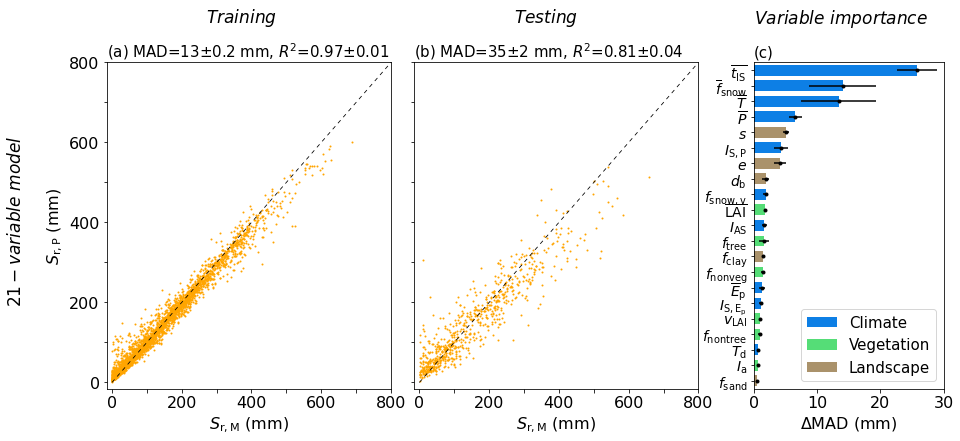

In [55]:
# scatter plots
x = np.linspace(0,800,100)
y = x
cmap_rdbu = cm.get_cmap('bwr_r', 4)
cmap_rdbu = ListedColormap([cmap_rdbu(0),cmap_rdbu(1),cmap_rdbu(2),cmap_rdbu(3)])
bounds = np.linspace(0, 4, 5)
bounds2 = bounds
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

# color catchments in scatter plot based on error and use same colors on a map
df_train['group'] = np.nan
ix2 = df_train[(df_train['Sr_p-Sr_m']<train_mae)&(df_train['Sr_p-Sr_m']>0)].index
ix1 = df_train[(df_train['Sr_p-Sr_m']>train_mae)].index
ix3 = df_train[(df_train['Sr_p-Sr_m']>-train_mae)&(df_train['Sr_p-Sr_m']<0)].index
ix4 = df_train[(df_train['Sr_p-Sr_m']<-train_mae)].index
df_train.loc[ix1,'group'] = 0
df_train.loc[ix2,'group'] = 1
df_train.loc[ix3,'group'] = 2
df_train.loc[ix4,'group'] = 3

df_test['group'] = np.nan
ix2 = df_test[(df_test['Sr_p-Sr_m']<test_mae)&(df_test['Sr_p-Sr_m']>0)].index
ix1 = df_test[(df_test['Sr_p-Sr_m']>test_mae)].index
ix3 = df_test[(df_test['Sr_p-Sr_m']>-test_mae)&(df_test['Sr_p-Sr_m']<0)].index
ix4 = df_test[(df_test['Sr_p-Sr_m']<-test_mae)].index
df_test.loc[ix1,'group'] = 0
df_test.loc[ix2,'group'] = 1
df_test.loc[ix3,'group'] = 2
df_test.loc[ix4,'group'] = 3

fig1, ax = plt.subplots(1,4, figsize=(15,6),gridspec_kw={'width_ratios': [3,3,0.1,2]})
ax[2].axis('off')
plt.subplots_adjust(wspace=0.12)
s=ax[0].scatter(df_train.Sr_m,df_train.Sr_p,c='orange',s=1,cmap=cmap_rdbu,norm=norm,zorder=10)
ax[0].plot(x,y,color='k',linestyle=(0, (5, 5)),linewidth=0.8,zorder=11)
ax[0].set_xlim(-15,800)
ax[0].set_ylim(-15,800)
ax[0].set_yticks([0,100,200,300,400,500,600,700,800])
ax[0].set_xticks([0,100,200,300,400,500,600,700,800])
ax[0].set_yticklabels([0,'',200,'',400,'',600,'',800])
ax[0].set_xticklabels([0,'',200,'',400,'',600,'',800])
ax[0].set_xlabel('$S_\mathrm{r,M}$ (mm)',size=16)
ax[0].set_ylabel('$S_\mathrm{r,P}$ (mm)',size=16)
ax[0].tick_params(axis='both', labelsize=16)
ax[0].set_title(f'(a) MAD={int(mae_train_mean)}$\pm${np.round(mae_train_std,1)} mm, $R^2$={np.round(r2_train_mean,2)}$\pm${np.round(r2_train_std,2)}', loc='left',size=15)
ax[0].text(270,900,'$\it{Training}$',size=17)
ax[0].text(-300,200,'$\it{21-variable}$ $\it{model}$',size=17,rotation=90)

s=ax[1].scatter(df_test.Sr_m,df_test.Sr_p,c='orange',s=1,cmap=cmap_rdbu,norm=norm,zorder=10)
ax[1].plot(x,y,color='k',linestyle=(0, (5, 5)),linewidth=0.8,zorder=11)
ax[1].set_xlim(-15,800)
ax[1].set_ylim(-15,800)
ax[1].set_yticks([0,100,200,300,400,500,600,700,800])
ax[1].set_xticks([0,100,200,300,400,500,600,700,800])
ax[1].set_yticklabels(['','','','','','','','',''])
ax[1].set_xticklabels([0,'',200,'',400,'',600,'',800])
ax[1].set_xlabel('$S_\mathrm{r,M}$ (mm)',size=16)
ax[1].tick_params(axis='both', labelsize=16)
ax[1].set_title(f'(b) MAD={int(mae_test_mean)}$\pm${int(np.round(mae_test_std,0))} mm, $R^2$={np.round(r2_test_mean,2)}$\pm${np.round(r2_test_std,2)}', loc='left',size=15)
ax[1].text(270,900,'$\it{Testing}$',size=17)

# feature importances
ddd = ddd.sort_values(by='mean')
ax[3].barh(ddd.features2,ddd['mean'],height=0.7,color=ddd.colors)
# ax[3].barh(ddd.index,ddd['mean'],height=0.7,color=ddd.colors)
ax[3].barh(0,-5,height=0.7,color=ddd.colors[2],label='Climate')
ax[3].barh(0,-5,height=0.7,color=ddd.colors[1],label='Vegetation')
ax[3].barh(0,-5,height=0.7,color=ddd.colors[0],label='Landscape')
ax[3].errorbar(ddd['mean'],ddd.features2, xerr=ddd['std'], fmt=".", color="black")
ax[3].set_xlabel('$\Delta$MAD (mm)',size=16)
ax[3].tick_params(axis='x', labelsize=16)
ax[3].tick_params(axis='y', labelsize=14)
ax[3].set_ylim(-0.5,20.5)
ax[3].set_xlim(0,30)
ax[3].set_title('(c)', loc='left',size=15)
ax[3].legend(loc='lower right',fontsize=15)
ax[3].text(0,23,'$\it{Variable}$ $\it{importance}$',size=17)

# fig1.savefig(f'{work_dir}/output/regression/figures/interpretation/scatter_{mod}.jpg',bbox_inches='tight',dpi=300)
fig1.savefig(f'{fig_dir}/scatter_{mod}.jpg',bbox_inches='tight',dpi=300)


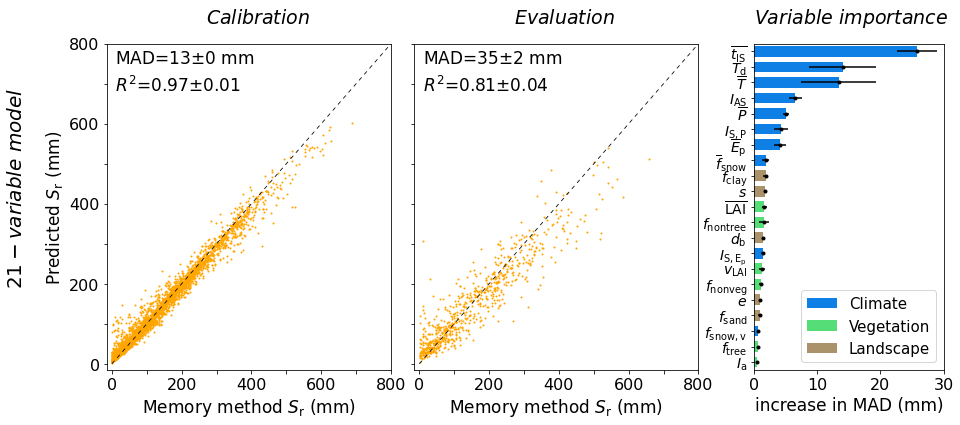

In [104]:
# scatter plots
x = np.linspace(0,800,100)
y = x
cmap_rdbu = cm.get_cmap('bwr_r', 4)
cmap_rdbu = ListedColormap([cmap_rdbu(0),cmap_rdbu(1),cmap_rdbu(2),cmap_rdbu(3)])
# cmap_rdbu = ListedColormap([cmap_rdbu(1),cmap_rdbu(0),cmap_rdbu(3),cmap_rdbu(2)])

bounds = np.linspace(0, 4, 5)
bounds2 = bounds
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

# color catchments in scatter plot based on error and use same colors on a map
df_train['group'] = np.nan
ix2 = df_train[(df_train['Sr_p-Sr_m']<train_mae)&(df_train['Sr_p-Sr_m']>0)].index
ix1 = df_train[(df_train['Sr_p-Sr_m']>train_mae)].index
ix3 = df_train[(df_train['Sr_p-Sr_m']>-train_mae)&(df_train['Sr_p-Sr_m']<0)].index
ix4 = df_train[(df_train['Sr_p-Sr_m']<-train_mae)].index
df_train.loc[ix1,'group'] = 0
df_train.loc[ix2,'group'] = 1
df_train.loc[ix3,'group'] = 2
df_train.loc[ix4,'group'] = 3

df_test['group'] = np.nan
ix2 = df_test[(df_test['Sr_p-Sr_m']<test_mae)&(df_test['Sr_p-Sr_m']>0)].index
ix1 = df_test[(df_test['Sr_p-Sr_m']>test_mae)].index
ix3 = df_test[(df_test['Sr_p-Sr_m']>-test_mae)&(df_test['Sr_p-Sr_m']<0)].index
ix4 = df_test[(df_test['Sr_p-Sr_m']<-test_mae)].index
df_test.loc[ix1,'group'] = 0
df_test.loc[ix2,'group'] = 1
df_test.loc[ix3,'group'] = 2
df_test.loc[ix4,'group'] = 3

fig1, ax = plt.subplots(1,4, figsize=(15,6),gridspec_kw={'width_ratios': [3,3,0.1,2]})
ax[2].axis('off')
plt.subplots_adjust(wspace=0.12)
s=ax[0].scatter(df_train.Sr_m,df_train.Sr_p,c='orange',s=1,cmap=cmap_rdbu,norm=norm,zorder=10)
ax[0].plot(x,y,color='k',linestyle=(0, (5, 5)),linewidth=0.8,zorder=11)
ax[0].set_xlim(-15,800)
ax[0].set_ylim(-15,800)
ax[0].set_yticks([0,100,200,300,400,500,600,700,800])
ax[0].set_xticks([0,100,200,300,400,500,600,700,800])
ax[0].set_yticklabels([0,'',200,'',400,'',600,'',800])
ax[0].set_xticklabels([0,'',200,'',400,'',600,'',800])
ax[0].set_xlabel('Memory method $S_\mathrm{r}$ (mm)',size=17)
ax[0].set_ylabel('Predicted $S_\mathrm{r}$ (mm)',size=17)
ax[0].tick_params(axis='both', labelsize=16)
ax[0].text(10,750,f'MAD={int(mae_train_mean)}$\pm${int(np.round(mae_train_std,0))} mm',size=17)
ax[0].text(10,680,f'$R^2$={np.round(r2_train_mean,2)}$\pm${np.round(r2_train_std,2)}',size=17)
# ax[0].set_title(f'(d) MAD={int(mae_train_mean)}$\pm${np.round(mae_train_std,1)} mm, $R^2$={np.round(r2_train_mean,2)}$\pm${np.round(r2_train_std,2)}', loc='left',size=15)
ax[0].text(270,850,'$\it{Calibration}$',size=19)
ax[0].text(-300,200,'$\it{21-variable}$ $\it{model}$',size=20,rotation=90)

s=ax[1].scatter(df_test.Sr_m,df_test.Sr_p,c='orange',s=1,cmap=cmap_rdbu,norm=norm,zorder=10)
ax[1].plot(x,y,color='k',linestyle=(0, (5, 5)),linewidth=0.8,zorder=11)
ax[1].set_xlim(-15,800)
ax[1].set_ylim(-15,800)
ax[1].set_yticks([0,100,200,300,400,500,600,700,800])
ax[1].set_xticks([0,100,200,300,400,500,600,700,800])
ax[1].set_yticklabels(['','','','','','','','',''])
ax[1].set_xticklabels([0,'',200,'',400,'',600,'',800])
ax[1].set_xlabel('Memory method $S_\mathrm{r}$ (mm)',size=17)
ax[1].tick_params(axis='both', labelsize=16)
ax[1].text(10,750,f'MAD={int(mae_test_mean)}$\pm${int(np.round(mae_test_std,0))} mm',size=17)
ax[1].text(10,680,f'$R^2$={np.round(r2_test_mean,2)}$\pm${np.round(r2_test_std,2)}',size=17)
# ax[1].set_title(f'(e) MAD={int(mae_test_mean)}$\pm${int(np.round(mae_test_std,0))} mm, $R^2$={np.round(r2_test_mean,2)}$\pm${np.round(r2_test_std,2)}', loc='left',size=15)
ax[1].text(270,850,'$\it{Evaluation}$',size=19)

# feature importances
ddd = ddd.sort_values(by='mean')
ax[3].barh(ddd.features2,ddd['mean'],height=0.7,color=ddd.colors)
ax[3].barh(0,-5,height=0.7,color=ddd.colors[2],label='Climate')
ax[3].barh(0,-5,height=0.7,color=ddd.colors[1],label='Vegetation')
ax[3].barh(0,-5,height=0.7,color=ddd.colors[4],label='Landscape')
ax[3].errorbar(ddd['mean'],ddd.features2, xerr=ddd['std'], fmt=".", color="black")
ax[3].set_xlabel('increase in MAD (mm)',size=17)
ax[3].tick_params(axis='x', labelsize=16)
ax[3].tick_params(axis='y', labelsize=14)
ax[3].set_ylim(-0.5,20.5)
ax[3].set_xlim(0,30)
# ax[3].set_title('(c)', loc='left',size=15)
ax[3].legend(loc='lower right',fontsize=15)
ax[3].text(0,21.8,'$\it{Variable}$ $\it{importance}$',size=19)

fig1.savefig(f'{fig_dir}/scatter_{mod}_presentation.jpg',bbox_inches='tight',dpi=300)


# MODEL B

In [193]:
mod = 'modelb'

In [194]:
#Europe
lat_min_e, lat_max_e = 35,75 # 36,46 only spain cluster
lon_min_e, lon_max_e = -12,29 # -10,5 only spain cluster

#Asia
lat_min_a, lat_max_a = 1,26
lon_min_a, lon_max_a = 68,105

#us
lat_min_u, lat_max_u = 12,65
lon_min_u, lon_max_u = -132,-52

#south america
lat_min_s, lat_max_s = -31,-3
lon_min_s, lon_max_s = -60,-32

#south africa
lat_min_f, lat_max_f = -35.3,-19.3
lon_min_f, lon_max_f = 12,36

#australia
lat_min_t, lat_max_t = -40,-25
lon_min_t, lon_max_t = 140,155

In [195]:
min_samples_leaf=1
max_depth=None
# n_estimators=100
# max_features=1

### cross validation

In [196]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_v2.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
df['catch_id'] = df.index
# features = ['t_mean','idu_mean','p_mean']#,'slp_mean']
features = ['t_mean','idu_mean','p_mean']#,'slp_mean']
sr_rp = 'sr_20'
ll = ['lat','lon','catch_id']

f = features + ll
dfx = df[f].values
dfy = df[sr_rp].values

# here split dataset into 'temp' and 'test'
cv_outer = 5 # the number of outer cross validations
sdf = pd.DataFrame(index=range(cv_outer), columns=['n_estimators','max_depth','min_samples_leaf','max_features','train_mae','train_r2_adj','test_mae','test_r2_adj','train_r2','test_r2','n_train','n_test','fold'])
l = []
train_dfs=[]
test_dfs=[]

kf = KFold(n_splits=cv_outer,shuffle=True,random_state=0)
df = dfy.reshape(-1, 1).ravel()
i=0
cv_train_ix = []
cv_test_ix = []
ddl = []
for train_ix, test_ix in kf.split(dfx):
    cv_train_ix.append(train_ix)
    cv_test_ix.append(test_ix)
    X = dfx[train_ix]
    y = dfy[train_ix]
    X_test = dfx[test_ix]
    y_test = dfy[test_ix] 
    
    # save lat lon columns
    lat_train = X[:,-3]
    lon_train = X[:,-2]
    lat_test = X_test[:,-3]
    lon_test = X_test[:,-2]
    catch_id_train = X[:,-1]
    catch_id_test = X_test[:,-1]

    # remove lat lon catchid columns
    X = np.delete(X,-1,1)
    X = np.delete(X,-1,1)
    X = np.delete(X,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)  
    
    # run rf model with full 'temp' set and test set using the best inner cross validation
    rf = RandomForestRegressor(criterion='absolute_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    rf.fit(X,y)
    test_y_pred = rf.predict(X_test)
    train_y_pred = rf.predict(X)
    n_train,n_test = len(y),len(y_test)

    train_mae = np.round(mean_absolute_error(y, train_y_pred),2)
    train_r2_adj =  np.round(r2_adj(y, train_y_pred,features),2)
    train_r2 = np.round(r2_score(y, train_y_pred),2)
    
    test_mae = np.round(mean_absolute_error(y_test, test_y_pred),2)
    test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
    test_r2 = np.round(r2_score(y_test, test_y_pred),2)
    
    perm_importance = permutation_importance(rf, X_test, y_test,scoring='neg_mean_absolute_error',random_state=42)
    # perm_importance = permutation_importance(rf, X_train, y_test,scoring='neg_mean_absolute_error',random_state=42)
    pi = perm_importance.importances_mean
    dd = pd.DataFrame(index=features,columns=['pi'])
    dd.pi = pi
    ddl.append(dd)
    
    df_train = pd.DataFrame(index=catch_id_train,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_train['lat'] = lat_train
    df_train['lon'] = lon_train
    df_train['Sr_m'] = y
    df_train['Sr_p'] = train_y_pred
    df_train['Sr_p-Sr_m'] = train_y_pred - y
    df_train['(Sr_p-Sr_m)/Sr_m'] = (train_y_pred - y)/train_y_pred
    train_dfs.append(df_train)

    df_test = pd.DataFrame(index=catch_id_test,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_test['lat'] = lat_test
    df_test['lon'] = lon_test
    df_test['Sr_m'] = y_test
    df_test['Sr_p'] = test_y_pred
    df_test['Sr_p-Sr_m'] = test_y_pred - y_test
    df_test['(Sr_p-Sr_m)/Sr_m'] = (test_y_pred - y_test)/test_y_pred
    test_dfs.append(df_test)

    # save scores in dataframe
    # sdf.loc[i][['n_estimators','max_depth','min_samples_leaf','max_features']] = [n_estimators,max_depth,min_samples_leaf,max_features]
    sdf.loc[i]['fold'] = i
    sdf.loc[i][['train_mae','train_r2_adj','train_r2']] = [train_mae,train_r2_adj,train_r2]
    sdf.loc[i][['test_mae','test_r2_adj','test_r2']] = [test_mae,test_r2_adj,test_r2]
    sdf.loc[i][['n_train','n_test']] = [n_train,n_test]
    print(i)
    i+=1

0
1
2
3
4


In [197]:
sdf

n_estimators max_depth min_samples_leaf max_features train_mae train_r2_adj  \
0          NaN       NaN              NaN          NaN     16.79         0.96   
1          NaN       NaN              NaN          NaN     16.41         0.96   
2          NaN       NaN              NaN          NaN     16.54         0.96   
3          NaN       NaN              NaN          NaN      16.9         0.96   
4          NaN       NaN              NaN          NaN     17.05         0.96   

  test_mae test_r2_adj train_r2 test_r2 n_train n_test fold  
0    42.11        0.78     0.96    0.78    2889    723    0  
1    45.68        0.66     0.96    0.66    2889    723    1  
2    42.51        0.73     0.96    0.73    2890    722    2  
3    42.36        0.74     0.96    0.74    2890    722    3  
4    40.38        0.78     0.96    0.78    2890    722    4

In [198]:
# r squared
r2_train_mean = (sdf.train_r2.mean(axis=0))
r2_train_std = (sdf.train_r2.std(axis=0))
r2_test_mean = (sdf.test_r2.mean(axis=0))
r2_test_std = (sdf.test_r2.std(axis=0))
print(r2_train_mean, r2_train_std)
print(r2_test_mean, r2_test_std)

0.96 0.0
0.7380000000000001 0.04919349550499537


In [199]:
#adjusted r squared
r2_train_mean = (sdf.train_r2_adj.mean(axis=0))
r2_train_std = (sdf.train_r2_adj.std(axis=0))
r2_test_mean = (sdf.test_r2_adj.mean(axis=0))
r2_test_std = (sdf.test_r2_adj.std(axis=0))
print(r2_train_mean, r2_train_std)
print(r2_test_mean, r2_test_std)

0.96 0.0
0.7380000000000001 0.04919349550499537


In [200]:
mae_train_mean = (sdf.train_mae.mean(axis=0))
mae_train_std = (sdf.train_mae.std(axis=0))
mae_test_mean = (sdf.test_mae.mean(axis=0))
mae_test_std = (sdf.test_mae.std(axis=0))
print(mae_train_mean, mae_train_std)
print(mae_test_mean, mae_test_std)

16.738 0.2612852846985456
42.60799999999999 1.918350854249555


In [201]:
len(df)

3612

In [202]:
# permutation importances for each cv fold
ddd = pd.DataFrame(index=ddl[0].index, columns=['pi0','pi1','pi2','pi3'])
ddd.pi0 = ddl[0].pi
ddd.pi1 = ddl[1].pi
ddd.pi2 = ddl[2].pi
ddd.pi3 = ddl[3].pi
ddd['mean'] = ddd.mean(axis=1)
ddd['std'] = ddd[['pi0','pi1','pi2','pi3']].std(axis=1)
ddd = ddd.sort_values(by='mean',ascending=False)
# ddd['features2'] = ['$\overline{t_\mathrm{IS}}$','$\overline{T}$','$\overline{P}$','$I_{\mathrm{AS}}$']
ddd['features2'] = ['$\overline{t_\mathrm{IS}}$','$\overline{T}$','$\overline{P}$','$s$']
# rb = cm.get_cmap('tab10', 9)
# c1,c2,c3,c4,c5,c6,c7,c8,c9 = rb(0),rb(1),rb(2),rb(3),rb(4),rb(5),rb(6),rb(7),rb(8)
# ddd['colors'] = [c1,c2,c2,c8,c4,c4,c2,c2,c6,c3,c9,c9,c5,c2,c9,c9,c3,c6,c2,c9,c7]
ddd

ValueError: Length of values (4) does not match length of index (3)

In [ ]:
# get mae for different regions
ll_e = lat_max_e, lat_min_e, lon_max_e, lon_min_e
ll_a = lat_max_a, lat_min_a, lon_max_a, lon_min_a
ll_u = lat_max_u, lat_min_u, lon_max_u, lon_min_u
ll_s = lat_max_s, lat_min_s, lon_max_s, lon_min_s
ll_f = lat_max_f, lat_min_f, lon_max_f, lon_min_f
ll_t = lat_max_t, lat_min_t, lon_max_t, lon_min_t
ll = [ll_e,ll_a,ll_u,ll_s,ll_f,ll_t]

dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = train_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['Sr_p-Sr_m']).mean()
        dfr.iloc[i,j] = mae
dfrr = pd.DataFrame(index=['mean','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
dfrr.loc['mean',:] = np.round(dfr.mean(axis=0),0)
dfrr.loc['median',:] = np.round(dfr.mean(axis=0),0)
dfrr.loc['std',:] = np.round(dfr.std(axis=0),0)

dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = test_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['Sr_p-Sr_m']).mean()
        dfr.iloc[i,j] = mae
dfrrt = pd.DataFrame(index=['mean','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
dfrrt.loc['mean',:] = np.round(dfr.mean(axis=0),0)
dfrrt.loc['median',:] = np.round(dfr.mean(axis=0),0)
dfrrt.loc['std',:] = np.round(dfr.std(axis=0),0)

# relative
dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = train_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['(Sr_p-Sr_m)/Sr_m']).mean()
        dfr.iloc[i,j] = mae
dfrr_rel = pd.DataFrame(index=['mean','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
dfrr_rel.loc['mean',:] = np.round(dfr.mean(axis=0),2)
dfrr_rel.loc['median',:] = np.round(dfr.median(axis=0),2)
dfrr_rel.loc['std',:] = np.round(dfr.std(axis=0),2)

dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = test_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['(Sr_p-Sr_m)/Sr_m']).mean()
        dfr.iloc[i,j] = mae
dfrrt_rel = pd.DataFrame(index=['mean','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
dfrrt_rel.loc['mean',:] = np.round(dfr.mean(axis=0),2)
dfrrt_rel.loc['median',:] = np.round(dfr.median(axis=0),2)
dfrrt_rel.loc['std',:] = np.round(dfr.std(axis=0),2)

In [ ]:
#test
dfrrt

In [ ]:
#test rel
dfrrt_rel = dfrrt_rel*100
dfrrt_rel

In [ ]:
# get mae for different regions
ll_e = lat_max_e, lat_min_e, lon_max_e, lon_min_e
ll_a = lat_max_a, lat_min_a, lon_max_a, lon_min_a
ll_u = lat_max_u, lat_min_u, lon_max_u, lon_min_u
ll_s = lat_max_s, lat_min_s, lon_max_s, lon_min_s
ll_f = lat_max_f, lat_min_f, lon_max_f, lon_min_f
ll_t = lat_max_t, lat_min_t, lon_max_t, lon_min_t
ll = [ll_e,ll_a,ll_u,ll_s,ll_f,ll_t]

dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = train_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['Sr_p-Sr_m']).median()
        dfr.iloc[i,j] = mae
mdfrr = pd.DataFrame(index=['median','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
mdfrr.loc['median',:] = np.round(dfr.median(axis=0),0)
mdfrr.loc['median',:] = np.round(dfr.median(axis=0),0)
mdfrr.loc['std',:] = np.round(dfr.std(axis=0),0)

dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = test_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['Sr_p-Sr_m']).median()
        dfr.iloc[i,j] = mae
mdfrrt = pd.DataFrame(index=['median','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
mdfrrt.loc['median',:] = np.round(dfr.median(axis=0),0)
mdfrrt.loc['median',:] = np.round(dfr.median(axis=0),0)
mdfrrt.loc['std',:] = np.round(dfr.std(axis=0),0)

# relative
dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = train_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['(Sr_p-Sr_m)/Sr_m']).median()
        dfr.iloc[i,j] = mae
mdfrr_rel = pd.DataFrame(index=['median','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
mdfrr_rel.loc['median',:] = np.round(dfr.median(axis=0),2)
mdfrr_rel.loc['median',:] = np.round(dfr.median(axis=0),2)
mdfrr_rel.loc['std',:] = np.round(dfr.std(axis=0),2)

dfr = pd.DataFrame(index=[0,1,2,3,4], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
for i in range(len(train_dfs)):
    df = test_dfs[i]
    for j in range(len(ll)):
        k = ll[j]
        lat_max,lat_min,lon_max,lon_min = k[0],k[1],k[2],k[3]
        dfs = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon<lon_max)&(df.lon>lon_min)]
        mae = abs(dfs['(Sr_p-Sr_m)/Sr_m']).median()
        dfr.iloc[i,j] = mae
mdfrrt_rel = pd.DataFrame(index=['median','std'], columns=['mad_europe','mad_asia','mad_northamerica','mad_southamerica','mad_southafrica','mad_australia'])
mdfrrt_rel.loc['median',:] = np.round(dfr.median(axis=0),2)
mdfrrt_rel.loc['median',:] = np.round(dfr.median(axis=0),2)
mdfrrt_rel.loc['std',:] = np.round(dfr.std(axis=0),2)

In [ ]:
#test
mdfrrt

In [ ]:
#test rel
mdfrrt_rel = mdfrrt_rel*100
mdfrrt_rel

In [203]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_v2.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
features = ['t_mean','idu_mean','p_mean']#,'slp_mean']
# features = ['t_mean','idu_mean','p_mean','slp_mean']
# features = ['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd']

In [204]:
df

p_mean   ep_mean     t_mean  tdiff_mean  idu_mean     si_ep  \
ca_0002351  1.590253  1.401269   0.643260   25.221876      5.05  0.704030   
cz_0000019  2.285853  1.484881   7.528472   22.165638      3.81  0.554593   
br_0001191  4.152597  3.260944  24.602384    4.562576      2.67  0.138040   
br_0000469  4.944120  3.258352  26.827793    2.495693      6.62  0.049197   
bw_0000006  1.358820  2.669859  20.623299   10.890681     12.46  0.245236   
...              ...       ...        ...         ...       ...       ...   
2342933     3.745021  2.813956  18.574819   20.548962      4.03  0.321256   
8155200     2.443305  2.539987  19.716896   20.792007      5.18  0.401462   
2472000     4.120200  2.897947  18.336339   20.451761      3.89  0.320265   
6784000     1.772299  1.731829   9.414148   29.647746      4.86  0.627384   
3161000     3.478882  2.387167  11.830899   21.926957      3.38  0.366783   

                si_p       asi     dtb        ia  ...    nonveg      pclay  \
ca_0002351  0.464383  0.000000   19.41  0.003286  ...  0.294740  17.094944   
cz_0000019  0.213216  0.024284   18.85  0.000002  ...  0.180999  16.322265   
br_0001191  0.173603  0.121069   25.74  0.003675  ...  0.073967  36.166791   
br_0000469  0.609147  0.114847   25.93  0.000325  ...  0.248321  28.315328   
bw_0000006  0.838107  0.037922   10.34  0.000000  ...  0.241470  21.254629   
...              ...       ...     ...       ...  ...       ...        ...   
2342933     0.142954  0.115187   13.33  0.002393  ...  0.112886  26.071614   
8155200     0.217222  0.057260    8.45  0.000323  ...  0.154220  32.240327   
2472000     0.123824  0.156997   18.81  0.000853  ...  0.140715  28.204969   
6784000     0.512336  0.000000  140.87  0.235538  ...  0.276233  18.066044   
3161000     0.087146  0.048016   16.34  0.002958  ...  0.107541  21.204575   

                psand  lai_mean   lai_rsd    sc_mean    sc_rsd       sr_20  \
ca_0002351  45.838508  0.950806  0.641162  41.416667  0.833385   86.691569   
cz_0000019  42.762079  1.885474  0.753561  25.416667  1.311083   51.681945   
br_0001191  44.203801  2.808409  0.113255   0.000000  0.000000  173.824040   
br_0000469  54.128498  1.862262  0.252759   0.000000  0.000000  333.062414   
bw_0000006  69.722858  0.581395  0.657466   0.000000  0.000000  221.777925   
...               ...       ...       ...        ...       ...         ...   
2342933     49.831392  2.687272  0.570877   0.083333  3.464102  264.588102   
8155200     38.662520  1.062247  0.224592   0.000000  0.000000  295.776515   
2472000     32.187203  2.862665  0.514875   0.000000  0.000000  236.554537   
6784000     51.319892  0.738392  0.884287   9.000000  1.464890  190.322812   
3161000     49.671926  2.571958  0.759432   3.833333  1.758196   31.902350   

                 lat        lon  
ca_0002351  51.01460 -114.08960  
cz_0000019  49.76040   16.97290  
br_0001191 -13.36460  -39.08130  
br_0000469  -6.67290  -48.46880  
bw_0000006 -21.08960   27.51460  
...              ...        ...  
2342933     32.01766  -85.29577  
8155200     30.29632  -97.92557  
2472000     31.70694  -89.40694  
6784000     41.03244  -98.74053  
3161000     36.39333  -81.40694  

[3612 rows x 24 columns]

In [205]:
sr_rp = 'sr_20'
df['catch_id'] = df.index
ll = ['lat','lon','catch_id']
f = features + ll
dfx = df[f].values
dfy = df[sr_rp].values

train_ix = cv_train_ix[1]
test_ix = cv_test_ix[1]

X_train = dfx[train_ix]
y_train = dfy[train_ix]
X_test = dfx[test_ix]
y_test = dfy[test_ix]

# save lat lon columns
lat_train = X_train[:,-3]
lon_train = X_train[:,-2]
lat_test = X_test[:,-3]
lon_test = X_test[:,-2]
catch_id_train = X_train[:,-1]
catch_id_test = X_test[:,-1]
# remove lat lon columns
X_train = np.delete(X_train,-1,1)
X_train = np.delete(X_train,-1,1)
X_train = np.delete(X_train,-1,1)
X_test = np.delete(X_test,-1,1)
X_test = np.delete(X_test,-1,1)
X_test = np.delete(X_test,-1,1)

rf = RandomForestRegressor(criterion='absolute_error',random_state=42,max_depth=max_depth,min_samples_leaf=min_samples_leaf,oob_score=True)
rf = rf.fit(X_train, y_train)
train_y_pred = rf.predict(X_train)
test_y_pred = rf.predict(X_test)
individual_tree_predictions = np.array([tree.predict(X_test) for tree in rf.estimators_]).T
std_test = np.std(individual_tree_predictions,axis=1)
individual_tree_predictions = np.array([tree.predict(X_train) for tree in rf.estimators_]).T
std_train = np.std(individual_tree_predictions,axis=1)

df_train = pd.DataFrame(index=catch_id_train,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m','std_train'])
df_train['lat'] = lat_train
df_train['lon'] = lon_train
df_train['Sr_m'] = y_train
df_train['Sr_p'] = train_y_pred
df_train['Sr_p-Sr_m'] = train_y_pred - y_train
df_train['(Sr_p-Sr_m)/Sr_m'] = (train_y_pred - y_train)/train_y_pred
df_train['std'] = std_train

df_test = pd.DataFrame(index=catch_id_test,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m','std_test'])
df_test['lat'] = lat_test
df_test['lon'] = lon_test
df_test['Sr_m'] = y_test
df_test['Sr_p'] = test_y_pred
df_test['Sr_p-Sr_m'] = test_y_pred - y_test
df_test['(Sr_p-Sr_m)/Sr_m'] = (test_y_pred - y_test)/test_y_pred
df_test['std'] = std_test

train_mse = int(mean_squared_error(y_train, train_y_pred))
train_mae = int(np.round(mean_absolute_error(y_train, train_y_pred),0))
train_r2 = np.round(r2_score(y_train, train_y_pred),2)
train_r2_adj =  np.round(r2_adj(y_train, train_y_pred,features),2)
train_rmse = int(rmse(y_train,train_y_pred))
train_mape =  np.round(mean_absolute_percentage_error(y_train, train_y_pred),2)

test_mse = int(mean_squared_error(y_test, test_y_pred))
test_mae = int(np.round(mean_absolute_error(y_test, test_y_pred),0))
test_r2 = np.round(r2_score(y_test, test_y_pred),2)
test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
test_rmse = int(rmse(y_test,test_y_pred))
test_mape = np.round(mean_absolute_percentage_error(y_test, test_y_pred),2)

n_test = len(y_test)
n_train = len(y_train)

perm_importance = permutation_importance(rf, X_test, y_test,scoring='neg_mean_absolute_error',n_repeats=10,random_state=42)
pi = perm_importance.importances_mean
dd = pd.DataFrame(index=features,columns=['pi_mean','pi_std'])
dd['pi_mean'] = pi
dd['pi_std'] = perm_importance.importances_std
dd = dd.sort_values(by='pi_mean') 

perm_importance = permutation_importance(rf, X_train, y_train,scoring='neg_mean_absolute_error',n_repeats=10,random_state=42)
pi = perm_importance.importances_mean
ddtr = pd.DataFrame(index=features,columns=['pi_mean','pi_std'])
ddtr['pi_mean'] = pi
ddtr['pi_std'] = perm_importance.importances_std
ddtr = ddtr.sort_values(by='pi_mean')    

sdf = pd.DataFrame(index=[0])
sdf[features] = np.round(pi,4)
sdf[['train_mse','train_rmse','train_mae','train_r2','train_r2_adj','train_mape']] = [train_mse,train_rmse,train_mae,train_r2,train_r2_adj,train_mape]
sdf[['test_mse','test_rmse','test_mae','test_r2','test_r2_adj','test_mape']] = [test_mse,test_rmse,test_mae,test_r2,test_r2_adj,test_mape]
sdf[['n_train','n_test']] = [n_train,n_test]


In [206]:
df_test

lat        lon        Sr_m        Sr_p   Sr_p-Sr_m  \
br_0001191  -13.3646   -39.0813  173.824040  174.741301    0.917261   
ca_0005679   49.0937  -120.6729  108.511781   55.619247  -52.892535   
us_0002162   32.9771   -85.7396  186.107329  185.762474   -0.344854   
fr_0000453   45.2646     1.3771  130.998251  129.347750   -1.650502   
ca_0004570   51.1396  -120.1187   26.879852   99.698269   72.818417   
...              ...        ...         ...         ...         ...   
3182500     38.18595  -80.13062   38.715440   43.411526    4.696086   
8101000     31.28489  -97.88502  325.049120  327.622098    2.572977   
7180500     38.19645  -96.82458  202.793262   93.367125 -109.426137   
9497980     33.82783 -110.85623  213.232311  190.320076  -22.912235   
8155200     30.29632  -97.92557  295.776515  328.264039   32.487525   

            (Sr_p-Sr_m)/Sr_m std_test        std  
br_0001191          0.005249      NaN  83.295712  
ca_0005679         -0.950975      NaN  58.022314  
us_0002162         -0.001856      NaN  42.197555  
fr_0000453         -0.012760      NaN  66.291912  
ca_0004570          0.730388      NaN  42.722681  
...                      ...      ...        ...  
3182500             0.108176      NaN  28.920850  
8101000             0.007853      NaN  58.311341  
7180500            -1.171999      NaN  73.069361  
9497980            -0.120388      NaN  66.742400  
8155200             0.098968      NaN  52.657496  

[723 rows x 8 columns]

AttributeError: 'DataFrame' object has no attribute 'features2'

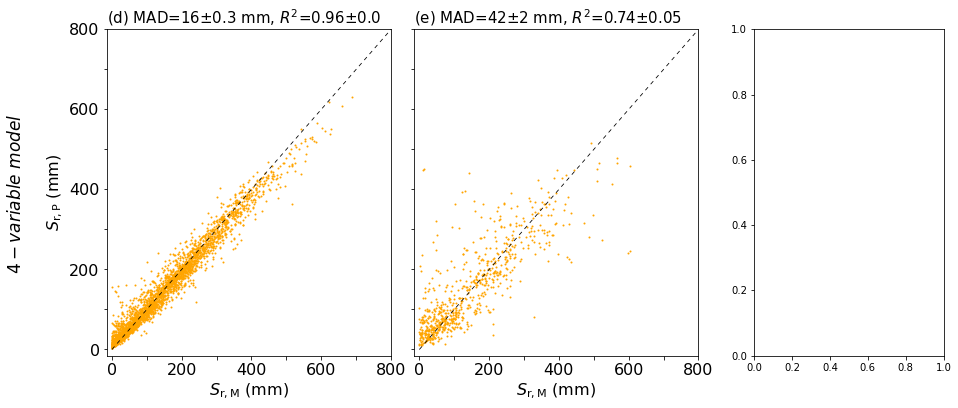

In [207]:
# scatter plots
x = np.linspace(0,800,100)
y = x
cmap_rdbu = cm.get_cmap('bwr_r', 4)
cmap_rdbu = ListedColormap([cmap_rdbu(0),cmap_rdbu(1),cmap_rdbu(2),cmap_rdbu(3)])
# cmap_rdbu = ListedColormap([cmap_rdbu(1),cmap_rdbu(0),cmap_rdbu(3),cmap_rdbu(2)])

bounds = np.linspace(0, 4, 5)
bounds2 = bounds
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

# color catchments in scatter plot based on error and use same colors on a map
df_train['group'] = np.nan
ix2 = df_train[(df_train['Sr_p-Sr_m']<train_mae)&(df_train['Sr_p-Sr_m']>0)].index
ix1 = df_train[(df_train['Sr_p-Sr_m']>train_mae)].index
ix3 = df_train[(df_train['Sr_p-Sr_m']>-train_mae)&(df_train['Sr_p-Sr_m']<0)].index
ix4 = df_train[(df_train['Sr_p-Sr_m']<-train_mae)].index
df_train.loc[ix1,'group'] = 0
df_train.loc[ix2,'group'] = 1
df_train.loc[ix3,'group'] = 2
df_train.loc[ix4,'group'] = 3

df_test['group'] = np.nan
ix2 = df_test[(df_test['Sr_p-Sr_m']<test_mae)&(df_test['Sr_p-Sr_m']>0)].index
ix1 = df_test[(df_test['Sr_p-Sr_m']>test_mae)].index
ix3 = df_test[(df_test['Sr_p-Sr_m']>-test_mae)&(df_test['Sr_p-Sr_m']<0)].index
ix4 = df_test[(df_test['Sr_p-Sr_m']<-test_mae)].index
df_test.loc[ix1,'group'] = 0
df_test.loc[ix2,'group'] = 1
df_test.loc[ix3,'group'] = 2
df_test.loc[ix4,'group'] = 3

fig1, ax = plt.subplots(1,4, figsize=(15,6),gridspec_kw={'width_ratios': [3,3,0.1,2]})
ax[2].axis('off')
plt.subplots_adjust(wspace=0.12)
s=ax[0].scatter(df_train.Sr_m,df_train.Sr_p,c='orange',s=1,cmap=cmap_rdbu,norm=norm,zorder=10)
ax[0].plot(x,y,color='k',linestyle=(0, (5, 5)),linewidth=0.8,zorder=11)
ax[0].set_xlim(-15,800)
ax[0].set_ylim(-15,800)
ax[0].set_yticks([0,100,200,300,400,500,600,700,800])
ax[0].set_xticks([0,100,200,300,400,500,600,700,800])
ax[0].set_yticklabels([0,'',200,'',400,'',600,'',800])
ax[0].set_xticklabels([0,'',200,'',400,'',600,'',800])
ax[0].set_xlabel('$S_\mathrm{r,M}$ (mm)',size=16)
ax[0].set_ylabel('$S_\mathrm{r,P}$ (mm)',size=16)
ax[0].tick_params(axis='both', labelsize=16)
ax[0].set_title(f'(d) MAD={int(mae_train_mean)}$\pm${np.round(mae_train_std,1)} mm, $R^2$={np.round(r2_train_mean,2)}$\pm${np.round(r2_train_std,2)}', loc='left',size=15)
ax[0].text(-300,200,'$\it{4-variable}$ $\it{model}$',size=17,rotation=90)

s=ax[1].scatter(df_test.Sr_m,df_test.Sr_p,c='orange',s=1,cmap=cmap_rdbu,norm=norm,zorder=10)
ax[1].plot(x,y,color='k',linestyle=(0, (5, 5)),linewidth=0.8,zorder=11)
ax[1].set_xlim(-15,800)
ax[1].set_ylim(-15,800)
ax[1].set_yticks([0,100,200,300,400,500,600,700,800])
ax[1].set_xticks([0,100,200,300,400,500,600,700,800])
ax[1].set_yticklabels(['','','','','','','','',''])
ax[1].set_xticklabels([0,'',200,'',400,'',600,'',800])
ax[1].set_xlabel('$S_\mathrm{r,M}$ (mm)',size=16)
ax[1].tick_params(axis='both', labelsize=16)
ax[1].set_title(f'(e) MAD={int(mae_test_mean)}$\pm${int(np.round(mae_test_std,0))} mm, $R^2$={np.round(r2_test_mean,2)}$\pm${np.round(r2_test_std,2)}', loc='left',size=15)

# feature importances
rb = cm.get_cmap('terrain', 10)
c1,c2,c3 = rb(1),rb(3),rb(6)
ddd = ddd.sort_values(by='mean')
ax[3].barh(ddd.features2,ddd['mean'],height=0.7,color=c1)
ax[3].errorbar(ddd['mean'],ddd.features2, xerr=ddd['std'], fmt=".", color="black")
ax[3].set_xlabel('$\Delta$MAD (mm)',size=16)
ax[3].tick_params(axis='x', labelsize=16)
ax[3].tick_params(axis='y', labelsize=16)
# ax[3].set_ylim(-0.5,20.5)
ax[3].set_xlim(0,50)
ax[3].set_title('(f)', loc='left',size=15)
# fig1.savefig(f'{work_dir}/output/regression/figures/interpretation/scatter_{mod}.jpg',bbox_inches='tight',dpi=300)
fig1.savefig(f'{fig_dir}/scatter_{mod}.jpg',bbox_inches='tight',dpi=300)


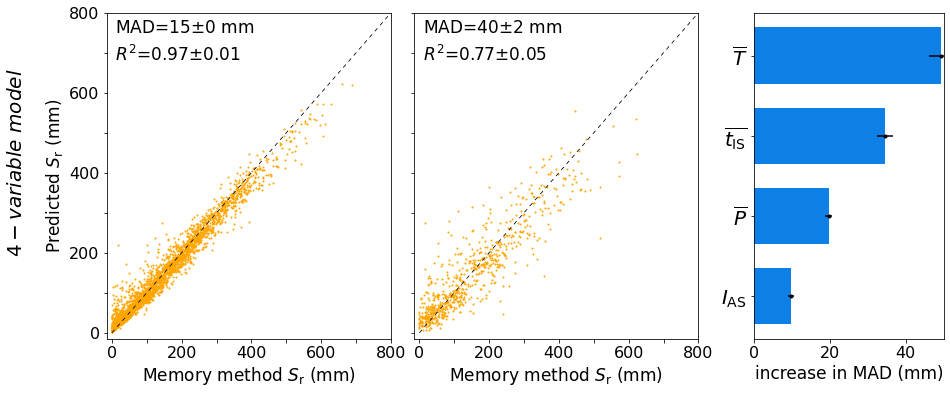

In [82]:
# scatter plots
x = np.linspace(0,800,100)
y = x
cmap_rdbu = cm.get_cmap('bwr_r', 4)
cmap_rdbu = ListedColormap([cmap_rdbu(0),cmap_rdbu(1),cmap_rdbu(2),cmap_rdbu(3)])
# cmap_rdbu = ListedColormap([cmap_rdbu(1),cmap_rdbu(0),cmap_rdbu(3),cmap_rdbu(2)])

bounds = np.linspace(0, 4, 5)
bounds2 = bounds
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

# color catchments in scatter plot based on error and use same colors on a map
df_train['group'] = np.nan
ix2 = df_train[(df_train['Sr_p-Sr_m']<train_mae)&(df_train['Sr_p-Sr_m']>0)].index
ix1 = df_train[(df_train['Sr_p-Sr_m']>train_mae)].index
ix3 = df_train[(df_train['Sr_p-Sr_m']>-train_mae)&(df_train['Sr_p-Sr_m']<0)].index
ix4 = df_train[(df_train['Sr_p-Sr_m']<-train_mae)].index
df_train.loc[ix1,'group'] = 0
df_train.loc[ix2,'group'] = 1
df_train.loc[ix3,'group'] = 2
df_train.loc[ix4,'group'] = 3

df_test['group'] = np.nan
ix2 = df_test[(df_test['Sr_p-Sr_m']<test_mae)&(df_test['Sr_p-Sr_m']>0)].index
ix1 = df_test[(df_test['Sr_p-Sr_m']>test_mae)].index
ix3 = df_test[(df_test['Sr_p-Sr_m']>-test_mae)&(df_test['Sr_p-Sr_m']<0)].index
ix4 = df_test[(df_test['Sr_p-Sr_m']<-test_mae)].index
df_test.loc[ix1,'group'] = 0
df_test.loc[ix2,'group'] = 1
df_test.loc[ix3,'group'] = 2
df_test.loc[ix4,'group'] = 3

fig1, ax = plt.subplots(1,4, figsize=(15,6),gridspec_kw={'width_ratios': [3,3,0.1,2]})
ax[2].axis('off')
plt.subplots_adjust(wspace=0.12)
s=ax[0].scatter(df_train.Sr_m,df_train.Sr_p,c='orange',s=1,cmap=cmap_rdbu,norm=norm,zorder=10)
ax[0].plot(x,y,color='k',linestyle=(0, (5, 5)),linewidth=0.8,zorder=11)
ax[0].set_xlim(-15,800)
ax[0].set_ylim(-15,800)
ax[0].set_yticks([0,100,200,300,400,500,600,700,800])
ax[0].set_xticks([0,100,200,300,400,500,600,700,800])
ax[0].set_yticklabels([0,'',200,'',400,'',600,'',800])
ax[0].set_xticklabels([0,'',200,'',400,'',600,'',800])
ax[0].set_xlabel('Memory method $S_\mathrm{r}$ (mm)',size=17)
ax[0].set_ylabel('Predicted $S_\mathrm{r}$ (mm)',size=17)
ax[0].tick_params(axis='both', labelsize=16)
ax[0].text(10,750,f'MAD={int(mae_train_mean)}$\pm${int(np.round(mae_train_std,0))} mm',size=17)
ax[0].text(10,680,f'$R^2$={np.round(r2_train_mean,2)}$\pm${np.round(r2_train_std,2)}',size=17)
# ax[0].set_title(f'(d) MAD={int(mae_train_mean)}$\pm${np.round(mae_train_std,1)} mm, $R^2$={np.round(r2_train_mean,2)}$\pm${np.round(r2_train_std,2)}', loc='left',size=15)
# ax[0].text(270,900,'$\it{Calibration}$',size=17)
ax[0].text(-300,200,'$\it{4-variable}$ $\it{model}$',size=20,rotation=90)

s=ax[1].scatter(df_test.Sr_m,df_test.Sr_p,c='orange',s=1,cmap=cmap_rdbu,norm=norm,zorder=10)
ax[1].plot(x,y,color='k',linestyle=(0, (5, 5)),linewidth=0.8,zorder=11)
ax[1].set_xlim(-15,800)
ax[1].set_ylim(-15,800)
ax[1].set_yticks([0,100,200,300,400,500,600,700,800])
ax[1].set_xticks([0,100,200,300,400,500,600,700,800])
ax[1].set_yticklabels(['','','','','','','','',''])
ax[1].set_xticklabels([0,'',200,'',400,'',600,'',800])
ax[1].set_xlabel('Memory method $S_\mathrm{r}$ (mm)',size=17)
ax[1].tick_params(axis='both', labelsize=16)
ax[1].text(10,750,f'MAD={int(mae_test_mean)}$\pm${int(np.round(mae_test_std,0))} mm',size=17)
ax[1].text(10,680,f'$R^2$={np.round(r2_test_mean,2)}$\pm${np.round(r2_test_std,2)}',size=17)
# ax[1].set_title(f'(e) MAD={int(mae_test_mean)}$\pm${int(np.round(mae_test_std,0))} mm, $R^2$={np.round(r2_test_mean,2)}$\pm${np.round(r2_test_std,2)}', loc='left',size=15)
# ax[1].text(270,900,'$\it{Evaluation}$',size=17)

# feature importances
rb = cm.get_cmap('terrain', 10)
c1,c2,c3 = rb(1),rb(3),rb(6)
ddd = ddd.sort_values(by='mean')
ax[3].barh(ddd.features2,ddd['mean'],height=0.7,color=c1)
ax[3].errorbar(ddd['mean'],ddd.features2, xerr=ddd['std'], fmt=".", color="black")
ax[3].set_xlabel('increase in MAD (mm)',size=17)
ax[3].tick_params(axis='x', labelsize=16)
ax[3].tick_params(axis='y', labelsize=20)
# ax[3].set_ylim(-0.5,20.5)
ax[3].set_xlim(0,50)
# ax[3].set_title('(f)', loc='left',size=15)

fig1.savefig(f'{fig_dir}/scatter_{mod}_presentation.jpg',bbox_inches='tight',dpi=300)


In [ ]:
# combine all cv's train and test results
test_dfs=[]
train_dfs=[]
for i in range(5):
    train_ix = cv_train_ix[i]
    test_ix = cv_test_ix[i]

    X_train = dfx[train_ix]
    y_train = dfy[train_ix]
    X_test = dfx[test_ix]
    y_test = dfy[test_ix]

    # save lat lon columns
    lat_train = X_train[:,-3]
    lon_train = X_train[:,-2]
    lat_test = X_test[:,-3]
    lon_test = X_test[:,-2]
    catch_id_train = X_train[:,-1]
    catch_id_test = X_test[:,-1]
    # remove lat lon columns
    X_train = np.delete(X_train,-1,1)
    X_train = np.delete(X_train,-1,1)
    X_train = np.delete(X_train,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)

    rf = RandomForestRegressor(criterion='absolute_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    rf = rf.fit(X_train, y_train)
    train_y_pred = rf.predict(X_train)
    test_y_pred = rf.predict(X_test)
    individual_tree_predictions = np.array([tree.predict(X_test) for tree in rf.estimators_]).T
    std_test = np.std(individual_tree_predictions,axis=1)
    individual_tree_predictions = np.array([tree.predict(X_train) for tree in rf.estimators_]).T
    std_train = np.std(individual_tree_predictions,axis=1)

    df_train = pd.DataFrame(index=catch_id_train,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m','std'])
    df_train['lat'] = lat_train
    df_train['lon'] = lon_train
    df_train['Sr_m'] = y_train
    df_train['Sr_p'] = train_y_pred
    df_train['Sr_p-Sr_m'] = train_y_pred - y_train
    df_train['(Sr_p-Sr_m)/Sr_m'] = (train_y_pred - y_train)/train_y_pred
    df_train['std'] = std_train
    train_dfs.append(df_train)

    df_test = pd.DataFrame(index=catch_id_test,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m','std'])
    df_test['lat'] = lat_test
    df_test['lon'] = lon_test
    df_test['Sr_m'] = y_test
    df_test['Sr_p'] = test_y_pred
    df_test['Sr_p-Sr_m'] = test_y_pred - y_test
    df_test['(Sr_p-Sr_m)/Sr_m'] = (test_y_pred - y_test)/test_y_pred
    df_test['std'] = std_test
    test_dfs.append(df_test)

test_dfs = pd.concat(test_dfs)
train_dfs = pd.concat(train_dfs)

# color catchments in scatter plot based on error and use same colors on a map
train_dfs['group'] = np.nan
ix2 = train_dfs[(train_dfs['Sr_p-Sr_m']<mae_train_mean)&(train_dfs['Sr_p-Sr_m']>0)].index
ix1 = train_dfs[(train_dfs['Sr_p-Sr_m']>mae_train_mean)].index
ix3 = train_dfs[(train_dfs['Sr_p-Sr_m']>-mae_train_mean)&(train_dfs['Sr_p-Sr_m']<0)].index
ix4 = train_dfs[(train_dfs['Sr_p-Sr_m']<-mae_train_mean)].index
train_dfs.loc[ix1,'group'] = 0
train_dfs.loc[ix2,'group'] = 1
train_dfs.loc[ix3,'group'] = 2
train_dfs.loc[ix4,'group'] = 3

test_dfs['group'] = np.nan
ix2 = test_dfs[(test_dfs['Sr_p-Sr_m']<mae_test_mean)&(test_dfs['Sr_p-Sr_m']>0)].index
ix1 = test_dfs[(test_dfs['Sr_p-Sr_m']>mae_test_mean)].index
ix3 = test_dfs[(test_dfs['Sr_p-Sr_m']>-mae_test_mean)&(test_dfs['Sr_p-Sr_m']<0)].index
ix4 = test_dfs[(test_dfs['Sr_p-Sr_m']<-mae_test_mean)].index
test_dfs.loc[ix1,'group'] = 0
test_dfs.loc[ix2,'group'] = 1
test_dfs.loc[ix3,'group'] = 2
test_dfs.loc[ix4,'group'] = 3

test_dfs.to_csv(f'{work_dir}/output/regression/rf_results_{mod}_combined_test.csv')

In [115]:
def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

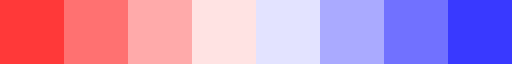

In [80]:
import matplotlib
cmap = cm.get_cmap('bwr_r', 10)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cmap_rdbu = ListedColormap(color_list[1:-1])
cmap_rdbu.set_over(color_list[-1])
cmap_rdbu.set_under(color_list[0])
cmap_rdbu

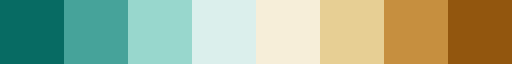

In [150]:
import matplotlib
cmap = cm.get_cmap('BrBG_r', 10)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cmap_rdbu = ListedColormap(color_list[1:-1])
cmap_rdbu.set_over(color_list[-1])
cmap_rdbu.set_under(color_list[0])
cmap_rdbu

In [151]:
#Europe
lat_min_e, lat_max_e = 35,62 # 36,46 only spain cluster
lon_min_e, lon_max_e = -12,29 # -10,5 only spain cluster

#Asia
lat_min_a, lat_max_a = 1,26
lon_min_a, lon_max_a = 68,105

#us
lat_min_u, lat_max_u = 12,65
lon_min_u, lon_max_u = -132,-52

#south america
lat_min_s, lat_max_s = -31,-3
lon_min_s, lon_max_s = -60,-32

#south africa
lat_min_f, lat_max_f = -35.3,-19.3
lon_min_f, lon_max_f = 12,36

#australia
lat_min_t, lat_max_t = -40,-25
lon_min_t, lon_max_t = 140,155

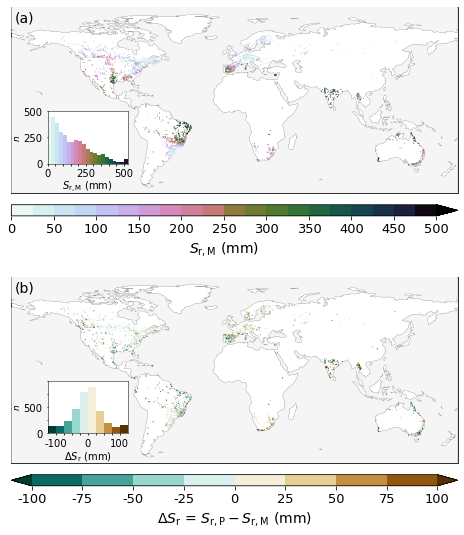

In [39]:
# sr memory method maps
# cmap_rdbu1 = cm.get_cmap('cubehelix_r', 13)
cmap_rdbu1 = cmap_sr
bounds = np.linspace(0,500,21)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu1.N)

fig2 = plt.figure(figsize=(8,16))
ax = fig2.add_subplot(211,projection=ccrs.PlateCarree())
plt.subplots_adjust(hspace=-0.55)

ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s=ax.scatter(test_dfs.lon,test_dfs.lat,s=0.7,c=test_dfs['Sr_m'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)
cbar.set_label('$S_\mathrm{r,M}$ (mm)',size=14)
cbar.set_ticks(bounds2)
cbar.set_ticklabels(['0','50','100','150','200','250','300','350','400','450','500'],size=13)
ax.text(-177,78,'(a)',size=14,zorder=101)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.07,0.13,1,1))
n=[]
for i in range(len(bounds)):
    if (i<len(bounds)-1):
        nn = len(test_dfs[(test_dfs['Sr_m']<bounds[i+1])&(test_dfs['Sr_m']>=bounds[i])])
    else:
        nn=len(test_dfs[(test_dfs['Sr_m']>=bounds[i])])
    n.append(nn)
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins=bounds
iax.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],n,width=1,
        color=[cmap_rdbu1(0),cmap_rdbu1(1),cmap_rdbu1(2),cmap_rdbu1(3),cmap_rdbu1(4),cmap_rdbu1(5),cmap_rdbu1(6),cmap_rdbu1(7),cmap_rdbu1(8),cmap_rdbu1(9),cmap_rdbu1(10),
              cmap_rdbu1(11),cmap_rdbu1(12),cmap_rdbu1(13),cmap_rdbu1(14),cmap_rdbu1(15),cmap_rdbu1(16),cmap_rdbu1(17),cmap_rdbu1(18),cmap_rdbu1(19),cmap_rdbu1(20)])
iax.set_xticks(np.arange(-0.5,20,2))
iax.set_xticklabels(['0','','','','','250','','','','','500'])
iax.set_xlim(-0.5,20.5)
iax.set_yticks([0,250,500])
iax.set_yticklabels(['0','250','500'])
iax.set_xlabel('$S_\mathrm{r,M}$ (mm)',size=10,labelpad=1)
iax.set_ylabel('$n$',size=9,labelpad=1)
iax.tick_params(axis='both',length=1.5, labelsize=10)


# all test results from cross validation on map - ABSDIFF
cmap_rdbu1 = cm.get_cmap('BrBG_r',10)
bounds = np.linspace(-100,100,9)
bounds2 = bounds
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

x=test_dfs['lat'].astype(float)
y=test_dfs['lon'].astype(float)
kde = gaussian_kde(np.vstack([x, y]))
density1 = kde(np.vstack([x, y]))*1000
density2 = (np.clip(density1, 0.06, 0.23))
test_dfs['density'] = 1/(density2*10)

ax = fig2.add_subplot(212,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s=ax.scatter(test_dfs.lon,test_dfs.lat,s=0.5*test_dfs['density'],c=test_dfs['Sr_p-Sr_m'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=105)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=40,norm=norm)
cbar.set_label('$\Delta$$S_\mathrm{r}$ = $S_\mathrm{r,P}-S_\mathrm{r,M}$ (mm)',size=14)
cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=13)
ax.text(-177,78,'(b)',size=14,zorder=101)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.07,0.13,1,1))
n0=len(test_dfs[test_dfs['Sr_p-Sr_m']<bounds[0]])
n1=len(test_dfs[(test_dfs['Sr_p-Sr_m']<bounds[1])&(test_dfs['Sr_p-Sr_m']>bounds[0])])
n2=len(test_dfs[(test_dfs['Sr_p-Sr_m']<bounds[2])&(test_dfs['Sr_p-Sr_m']>bounds[1])])
n3=len(test_dfs[(test_dfs['Sr_p-Sr_m']<bounds[3])&(test_dfs['Sr_p-Sr_m']>bounds[2])])
n4=len(test_dfs[(test_dfs['Sr_p-Sr_m']<bounds[4])&(test_dfs['Sr_p-Sr_m']>bounds[3])])
n5=len(test_dfs[(test_dfs['Sr_p-Sr_m']<bounds[5])&(test_dfs['Sr_p-Sr_m']>bounds[4])])
n6=len(test_dfs[(test_dfs['Sr_p-Sr_m']<bounds[6])&(test_dfs['Sr_p-Sr_m']>bounds[5])])
n7=len(test_dfs[(test_dfs['Sr_p-Sr_m']<bounds[7])&(test_dfs['Sr_p-Sr_m']>bounds[6])])
n8=len(test_dfs[(test_dfs['Sr_p-Sr_m']<bounds[8])&(test_dfs['Sr_p-Sr_m']>bounds[7])])
n9=len(test_dfs[(test_dfs['Sr_p-Sr_m']>bounds[8])])
n = [n0,n1,n2,n3,n4,n5,n6,n7,n8,n9]
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins=bounds
iax.bar([0,1,2,3,4,5,6,7,8,9],n,width=1,color=[cmap_rdbu1(0),cmap_rdbu1(1),cmap_rdbu1(2),cmap_rdbu1(3),cmap_rdbu1(4),cmap_rdbu1(5),cmap_rdbu1(6),cmap_rdbu1(7),cmap_rdbu1(8),cmap_rdbu1(9)])
iax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5])
iax.set_yticks([0,250,500,750,1000])
iax.set_yticklabels(['0','','500','',''])
iax.set_xticklabels(['-100','','','','0','','','','100'])
iax.set_xlim(-0.5,9.5)
iax.set_xlabel('$\Delta$$S_\mathrm{r}$ (mm)',size=10, labelpad=1)
iax.set_ylabel('$n$',size=9,labelpad=1)
iax.tick_params(axis='both',length=1.5, labelsize=10)

# fig2.savefig(f'{work_dir}/output/regression/figures/interpretation/test_maps2_{mod}.jpg',bbox_inches='tight',dpi=900)
fig2.savefig(f'{fig_dir}/fig03.jpg',bbox_inches='tight',dpi=900)


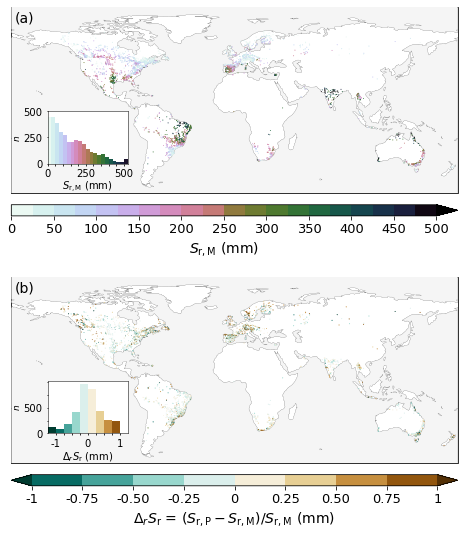

In [40]:
# sr memory method maps
# cmap_rdbu1 = cm.get_cmap('cubehelix_r', 13)
cmap_rdbu1 = cmap_sr
bounds = np.linspace(0,500,21)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu1.N)

fig2 = plt.figure(figsize=(8,16))
ax = fig2.add_subplot(211,projection=ccrs.PlateCarree())
plt.subplots_adjust(hspace=-0.55)

ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s=ax.scatter(test_dfs.lon,test_dfs.lat,s=0.7,c=test_dfs['Sr_m'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)
cbar.set_label('$S_\mathrm{r,M}$ (mm)',size=14)
cbar.set_ticks(bounds2)
cbar.set_ticklabels(['0','50','100','150','200','250','300','350','400','450','500'],size=13)
ax.text(-177,78,'(a)',size=14,zorder=101)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.07,0.13,1,1))
n=[]
for i in range(len(bounds)):
    if (i<len(bounds)-1):
        nn = len(test_dfs[(test_dfs['Sr_m']<bounds[i+1])&(test_dfs['Sr_m']>=bounds[i])])
    else:
        nn=len(test_dfs[(test_dfs['Sr_m']>=bounds[i])])
    n.append(nn)
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins=bounds
iax.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],n,width=1,
        color=[cmap_rdbu1(0),cmap_rdbu1(1),cmap_rdbu1(2),cmap_rdbu1(3),cmap_rdbu1(4),cmap_rdbu1(5),cmap_rdbu1(6),cmap_rdbu1(7),cmap_rdbu1(8),cmap_rdbu1(9),cmap_rdbu1(10),
              cmap_rdbu1(11),cmap_rdbu1(12),cmap_rdbu1(13),cmap_rdbu1(14),cmap_rdbu1(15),cmap_rdbu1(16),cmap_rdbu1(17),cmap_rdbu1(18),cmap_rdbu1(19),cmap_rdbu1(20)])
iax.set_xticks(np.arange(-0.5,20,2))
iax.set_xticklabels(['0','','','','','250','','','','','500'])
iax.set_xlim(-0.5,20.5)
iax.set_yticks([0,250,500])
iax.set_yticklabels(['0','250','500'])
iax.set_xlabel('$S_\mathrm{r,M}$ (mm)',size=10,labelpad=1)
iax.set_ylabel('$n$',size=9,labelpad=1)
iax.tick_params(axis='both',length=1.5, labelsize=10)


# all test results from cross validation on map - REL
cmap_rdbu1 = cm.get_cmap('BrBG_r',10)
bounds = np.linspace(-1,1,9)
bounds2 = bounds
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

x=test_dfs['lat'].astype(float)
y=test_dfs['lon'].astype(float)
kde = gaussian_kde(np.vstack([x, y]))
density1 = kde(np.vstack([x, y]))*1000
density2 = (np.clip(density1, 0.06, 0.23))
test_dfs['density'] = 1/(density2*10)

ax = fig2.add_subplot(212,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s=ax.scatter(test_dfs.lon,test_dfs.lat,s=0.5*test_dfs['density'],c=test_dfs['(Sr_p-Sr_m)/Sr_m'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=105)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=40,norm=norm)
cbar.set_label('$\Delta_r$$S_\mathrm{r}$ = ($S_\mathrm{r,P}-S_\mathrm{r,M})/S_\mathrm{r,M}$ (mm)',size=14)
cbar.set_ticklabels(['-1','-0.75','-0.50','-0.25','0','0.25','0.50','0.75','1'],size=13)
ax.text(-177,78,'(b)',size=14,zorder=101)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.07,0.13,1,1))
n0=len(test_dfs[test_dfs['(Sr_p-Sr_m)/Sr_m']<bounds[0]])
n1=len(test_dfs[(test_dfs['(Sr_p-Sr_m)/Sr_m']<bounds[1])&(test_dfs['(Sr_p-Sr_m)/Sr_m']>bounds[0])])
n2=len(test_dfs[(test_dfs['(Sr_p-Sr_m)/Sr_m']<bounds[2])&(test_dfs['(Sr_p-Sr_m)/Sr_m']>bounds[1])])
n3=len(test_dfs[(test_dfs['(Sr_p-Sr_m)/Sr_m']<bounds[3])&(test_dfs['(Sr_p-Sr_m)/Sr_m']>bounds[2])])
n4=len(test_dfs[(test_dfs['(Sr_p-Sr_m)/Sr_m']<bounds[4])&(test_dfs['(Sr_p-Sr_m)/Sr_m']>bounds[3])])
n5=len(test_dfs[(test_dfs['(Sr_p-Sr_m)/Sr_m']<bounds[5])&(test_dfs['(Sr_p-Sr_m)/Sr_m']>bounds[4])])
n6=len(test_dfs[(test_dfs['(Sr_p-Sr_m)/Sr_m']<bounds[6])&(test_dfs['(Sr_p-Sr_m)/Sr_m']>bounds[5])])
n7=len(test_dfs[(test_dfs['(Sr_p-Sr_m)/Sr_m']<bounds[7])&(test_dfs['(Sr_p-Sr_m)/Sr_m']>bounds[6])])
n8=len(test_dfs[(test_dfs['(Sr_p-Sr_m)/Sr_m']<bounds[8])&(test_dfs['(Sr_p-Sr_m)/Sr_m']>bounds[7])])
n9=len(test_dfs[(test_dfs['(Sr_p-Sr_m)/Sr_m']>bounds[8])])
n = [n0,n1,n2,n3,n4,n5,n6,n7,n8,n9]
n = [n0,n1,n2,n3,n4,n5,n6,n7,n8,n9]
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins=bounds
iax.bar([0,1,2,3,4,5,6,7,8,9],n,width=1,color=[cmap_rdbu1(0),cmap_rdbu1(1),cmap_rdbu1(2),cmap_rdbu1(3),cmap_rdbu1(4),cmap_rdbu1(5),cmap_rdbu1(6),cmap_rdbu1(7),cmap_rdbu1(8),cmap_rdbu1(9)])
iax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5])
iax.set_yticks([0,250,500,750,1000])
iax.set_yticklabels(['0','','500','',''])
iax.set_xticklabels(['-1','','','','0','','','','1'])
iax.set_xlim(-0.5,9.5)
iax.set_xlabel('$\Delta_r$$S_\mathrm{r}$ (mm)',size=10, labelpad=1)
iax.set_ylabel('$n$',size=9,labelpad=1)
iax.tick_params(axis='both',length=1.5, labelsize=10)

fig2.savefig(f'{fig_dir}/reldiff_maps.jpg',bbox_inches='tight',dpi=900)


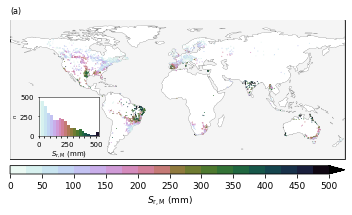

In [47]:
# sr memory method maps
cmap_rdbu1 = cm.get_cmap('cubehelix_r', 13)
cmap_rdbu1 = cmap_rdbu
bounds = np.linspace(0,500,21)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu1.N)

fig2 = plt.figure(figsize=(6,6))
# plt.subplots_adjust(wspace=0000.1,hspace=-0.4)
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s=ax.scatter(test_dfs.lon,test_dfs.lat,s=0.7,c=test_dfs['Sr_m'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
# cbar = plt.colorbar(s, orientation='vertical',spacing='proportional',extend='both', pad=0.02,aspect=15, norm=norm,shrink=0.35)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)
cbar.set_label('$S_\mathrm{r,M}$ (mm)',size=9)
cbar.set_ticks(bounds2)
cbar.set_ticklabels(['0','50','100','150','200','250','300','350','400','450','500'],size=9)
ax.set_title('(a)',size=8,loc='left')
# cbar.set_ticklabels([f'-{int(mae_test_mean)}','0',f'{int(mae_test_mean)}'],size=7)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.07,0.13,1,1))
n=[]
for i in range(len(bounds)):
    if (i<len(bounds)-1):
        nn = len(test_dfs[(test_dfs['Sr_m']<bounds[i+1])&(test_dfs['Sr_m']>=bounds[i])])
    else:
        nn=len(test_dfs[(test_dfs['Sr_m']>=bounds[i])])
    n.append(nn)
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins=bounds
iax.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],n,width=1,
        color=[cmap_rdbu1(0),cmap_rdbu1(1),cmap_rdbu1(2),cmap_rdbu1(3),cmap_rdbu1(4),cmap_rdbu1(5),cmap_rdbu1(6),cmap_rdbu1(7),cmap_rdbu1(8),cmap_rdbu1(9),cmap_rdbu1(10),
              cmap_rdbu1(11),cmap_rdbu1(12),cmap_rdbu1(13),cmap_rdbu1(14),cmap_rdbu1(15),cmap_rdbu1(16),cmap_rdbu1(17),cmap_rdbu1(18),cmap_rdbu1(19),cmap_rdbu1(20)])
iax.set_xticks(np.arange(-0.5,20,2))
iax.set_xticklabels(['0','','','','','250','','','','','500'])
iax.set_xlim(-0.5,20.5)
iax.set_yticks([0,250,500])
iax.set_yticklabels(['0','250','500'])
iax.set_xlabel('$S_\mathrm{r,M}$ (mm)',size=7,labelpad=1)
iax.set_ylabel('$n$',size=5,labelpad=1)
iax.tick_params(axis='both',length=1.5, labelsize=7)

fig2.savefig(f'{work_dir}/output/regression/figures/interpretation/sr_m_maps_{mod}.jpg',bbox_inches='tight',dpi=600)


## ICE plots - test results 5 cvs

In [ ]:
# combine all cv's train and test results
grid_resolution=100
ps = []
ics = []
for i in range(5):
    train_ix = cv_train_ix[i]
    test_ix = cv_test_ix[i]

    X_train = dfx[train_ix]
    y_train = dfy[train_ix]
    X_test = dfx[test_ix]
    y_test = dfy[test_ix]

    # save lat lon columns
    lat_train = X_train[:,-3]
    lon_train = X_train[:,-2]
    lat_test = X_test[:,-3]
    lon_test = X_test[:,-2]
    catch_id_train = X_train[:,-1]
    catch_id_test = X_test[:,-1]
    # remove lat lon columns
    X_train = np.delete(X_train,-1,1)
    X_train = np.delete(X_train,-1,1)
    X_train = np.delete(X_train,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)

    rf = RandomForestRegressor(criterion='absolute_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    # rf = RandomForestRegressor(criterion='squared_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth,oob_score=True)
    rf = rf.fit(X_train, y_train)
    train_y_pred = rf.predict(X_train)
    test_y_pred = rf.predict(X_test)
    df_train = pd.DataFrame(index=catch_id_train,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_train['lat'] = lat_train
    df_train['lon'] = lon_train
    df_train['Sr_m'] = y_train
    df_train['Sr_p'] = train_y_pred
    df_train['Sr_p-Sr_m'] = train_y_pred - y_train
    df_train['(Sr_p-Sr_m)/Sr_m'] = (train_y_pred - y_train)/train_y_pred

    df_test = pd.DataFrame(index=catch_id_test,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_test['lat'] = lat_test
    df_test['lon'] = lon_test
    df_test['Sr_m'] = y_test
    df_test['Sr_p'] = test_y_pred
    df_test['Sr_p-Sr_m'] = test_y_pred - y_test
    df_test['(Sr_p-Sr_m)/Sr_m'] = (test_y_pred - y_test)/test_y_pred
    
    pdps=[]
    ices=[]
    for k in range(len(features)):
        # a = partial_dependence(rf, features=[k], X=X_test, percentiles=(0.05, 0.95),grid_resolution=grid_resolution, kind='both')
        a = partial_dependence(rf, features=[k], X=X_test, percentiles=(0, 1),grid_resolution=grid_resolution, kind='both')
        if(k==1):
            a = partial_dependence(rf, features=[k], X=X_test, percentiles=(0, 1),grid_resolution=1000, kind='both') # higher grid resolution for idu mean
        pdpp = pd.DataFrame(index=['average'],data=a['average'],columns=a['values'][0])
        ice = pd.DataFrame(index=df_test.index, data=a['individual'][0],columns=a['values'][0])
        pdp = pd.concat([pdpp])
        pdps.append(pdp)
        ices.append(ice)
    ps.append(pdps)
    ics.append(ices)

In [208]:
# interpolate so we get same x axis for all cross validation folds
icsi=[]
for k in range(len(features)):
    ice0 = ics[0][k]
    ice1 = ics[1][k]
    ice2 = ics[2][k]
    ice3 = ics[3][k]
    ice4 = ics[4][k]
    
    x0 = ice0.columns.values
    x1 = ice1.columns.values
    x2 = ice2.columns.values
    x3 = ice3.columns.values
    x4 = ice4.columns.values
    
    mi = np.min([ice0.columns.values[0],ice1.columns.values[0],ice2.columns.values[0],ice3.columns.values[0],ice4.columns.values[0]])
    ma = np.max([ice0.columns.values[-1],ice1.columns.values[-1],ice2.columns.values[-1],ice3.columns.values[-1],ice4.columns.values[-1]])
    
    xx = np.linspace(mi,ma,100)
    if (k==1):
        xx = np.linspace(mi,ma,500)
    
    ice0i = pd.DataFrame(index=ice0.index,columns=xx)
    ice1i = pd.DataFrame(index=ice1.index,columns=xx)
    ice2i = pd.DataFrame(index=ice2.index,columns=xx)
    ice3i = pd.DataFrame(index=ice3.index,columns=xx)
    ice4i = pd.DataFrame(index=ice4.index,columns=xx)
    
    for i in ice0.index:
        y0 = ice0.loc[i].values
        y0i = np.interp(xx,x0,y0)
        ice0i.loc[i] = y0i
    for i in ice1.index:
        y1 = ice1.loc[i].values
        y1i = np.interp(xx,x1,y1)
        ice1i.loc[i] = y1i
    for i in ice2.index:
        y2 = ice2.loc[i].values
        y2i = np.interp(xx,x2,y2)
        ice2i.loc[i] = y2i
    for i in ice3.index:
        y3 = ice3.loc[i].values
        y3i = np.interp(xx,x3,y3)
        ice3i.loc[i] = y3i
    for i in ice4.index:
        y4 = ice4.loc[i].values
        y4i = np.interp(xx,x4,y4)
        ice4i.loc[i] = y4i
    icei = pd.concat([ice0i,ice1i,ice2i,ice3i,ice4i])
    icei = icei.astype(float)
    icsi.append(icei)

In [33]:
df.slp_mean.max()

23.13929557800293

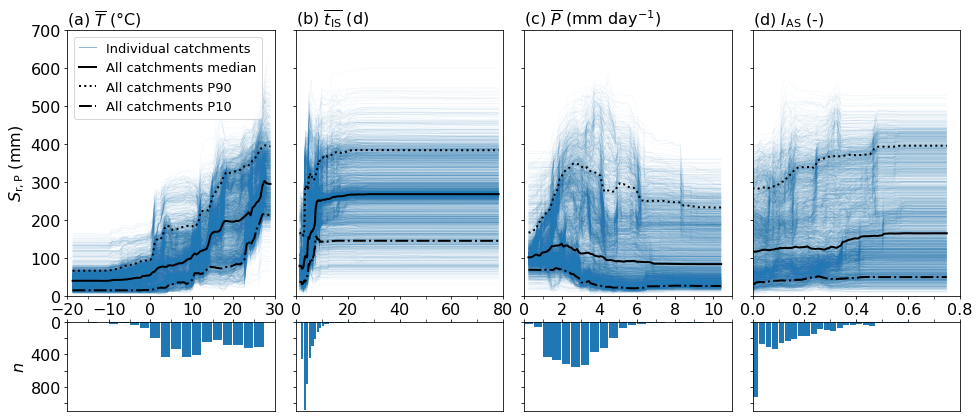

In [34]:
# ices based on 0-1 range, plot full range - interpolated
var = ['$\overline{T}$','$\overline{t_\mathrm{IS}}$','$\overline{P}$','$I_\mathrm{AS}$']
units = ['$\degree$C','d','mm $\mathrm{day}^{-1}$','-']
abcd = ['(a)','(b)','(c)','(d)']

major_t = [-20,-10,0,10,20,30]
minor_t = [-15,-5,5,15,25]
major_idu = [0,20,40,60,80]
minor_idu = [10,30,50,70]
major_p = [0,2,4,6,8,10]
minor_p = [1,3,5,7,9,11]
major_asi = [0,0.2,0.4,0.6,0.8]
minor_asi = [0.1,0.3,0.5,0.7]
majors = [major_t,major_idu,major_p,major_asi]
minors = [minor_t,minor_idu,minor_p,minor_asi]

xlims = [[-20,30],[0,80],[0,11],[0,0.8]]
ylims = [[1100,0],[1100,0],[1100,0],[1100,0]]

binst = np.arange(-20,30,2.5)
binsidu = np.arange(0,80,1)
binsp = np.arange(0,11,0.5)
binsasi = np.arange(0,0.8,0.025)
binslist = [binst,binsidu,binsp,binsasi]

# plot pdp TEST ALL CVS COMBINED
X = np.concatenate([X_train,X_test])
ddf = pd.concat([df_train,df_test])
fig3, ax = plt.subplots(2,len(features), figsize=(16,7),gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.15,wspace=0.1)
for k in range(len(features)):
    ice0 = icsi[k]

    c = 'tab:blue'
    for i in ice0.index:
        ax[0,k].plot(ice0.columns.values, ice0.loc[i],color=c,alpha=0.5,linestyle='-',linewidth=0.05)    
    
    ax[0,k].plot(ice0.columns.values, -1*ice0.iloc[0],color=c,alpha=0.5,linestyle='-',linewidth=1,label='Individual catchments')
    ax[0,k].plot(ice0.columns.values, ice0.median(axis=0),color='k',linestyle='-',linewidth=2, label='All catchments median')
    ax[0,k].plot(ice0.columns.values, np.quantile(ice0,0.9,axis=0),color='k',linestyle=':',linewidth=2, label='All catchments P90')
    ax[0,k].plot(ice0.columns.values, np.quantile(ice0,0.1,axis=0),color='k',linestyle='-.',linewidth=2, label='All catchments P10')

    ax[0,k].set_title(f'{abcd[k]} {var[k]} ({units[k]})',size=16, loc='left')
    ax[0,0].set_ylabel('$S_\mathrm{r,P}$ (mm)',size=16)
    ax[0,k].set_ylim(0,700)
    # ax[0,k].set_xlim(np.quantile(df.loc[:,features[k]],0.05),np.quantile(df.loc[:,features[k]],0.95))
    ax[0,k].set_xlim(xlims[k])
    # print(np.quantile(df.loc[:,features[k]],0.05),np.quantile(df.loc[:,features[k]],0.95))
    # print(np.quantile(df.loc[:,features[k]],0.01),np.quantile(df.loc[:,features[k]],0.99))
    ax[0,k].tick_params(axis='both',labelsize=16)
    ax[0,k].tick_params(which='major', length=3)
    ax[0,k].tick_params(which='minor', length=3)
    ax[0,k].set_xticks(ticks=majors[k])
    ax[0,k].set_xticks(ticks=minors[k],minor=True)
    # if(k==3):
    #     ax[0,3].set_xticklabels(['0','0.1','0.2','0.3','0.4'])
    ax[0,k].set_yticks(ticks=[0,100,200,300,400,500,600,700])
    ax[0,k].set_yticklabels(['','','','','','','',''])
    ax[0,0].set_yticklabels(['0','100','200','300','400','500','600','700'])
    ax[0,0].legend(loc='upper left',fontsize=13,handlelength=1.3)
           
    # bins = np.linspace(np.quantile(df.loc[:,features[k]],0),np.quantile(df.loc[:,features[k]],1),20)
    bins = binslist[k]
    ax[1,k].hist(df.loc[:,features[k]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c)
    ax[1,k].invert_yaxis()
    ax[1,k].xaxis.tick_top()
    # ax[1,k].set_xlim(np.quantile(df.loc[:,features[k]],0.05),np.quantile(df.loc[:,features[k]],0.95))
    ax[1,k].axes.get_xaxis().set_ticklabels([])
    ax[1,0].set_ylabel('$n$',size=16)
    ax[1,k].tick_params(axis='both', labelsize=16)
    ax[1,k].set_ylim(ylims[k])
    ax[1,k].set_yticks([0,200,400,600,800,1000])
    ax[1,k].set_yticklabels(['','','','','',''])
    ax[1,0].set_yticklabels(['0','','400','','800',''])
    ax[1,k].set_xlim(xlims[k])
    ax[1,k].set_xticks(ticks=majors[k])
    ax[1,k].set_xticks(ticks=minors[k],minor=True)
    ax[1,k].tick_params(which='major', length=3)
    ax[1,k].tick_params(which='minor', length=3)
    
fig3.savefig(f'{work_dir}/output/regression/figures/interpretation/pdp_alltest_{mod}_fullrange.jpg',bbox_inches='tight',dpi=300)

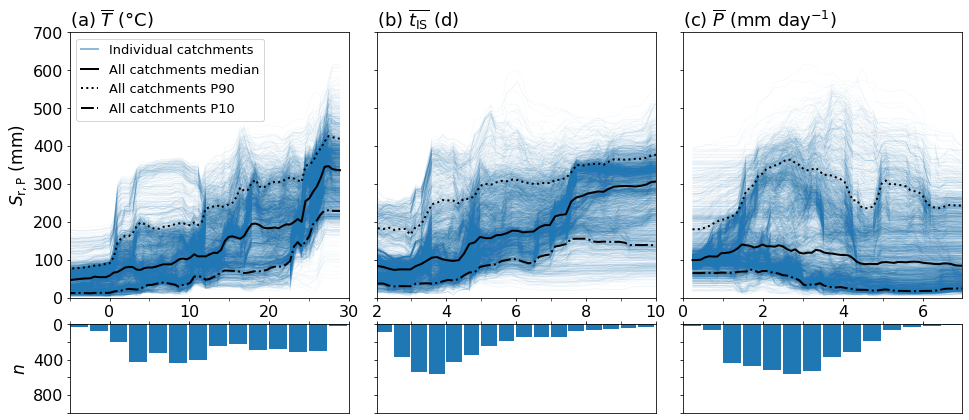

In [209]:
# ices based on 0-1 range, plot limited range - interpolated
var = ['$\overline{T}$','$\overline{t_\mathrm{IS}}$','$\overline{P}$','$I_\mathrm{AS}$']
units = ['$\degree$C','d','mm $\mathrm{day}^{-1}$','-']
abcd = ['(a)','(b)','(c)','(d)']

major_t = [0,10,20,30]
minor_t = [-5,5,15,25]
major_idu = [2,4,6,8,10]
minor_idu = [3,5,7,9]
major_p = [0,2,4,6]
minor_p = [1,3,5]
major_asi = [0,0.1,0.2,0.3,0.4,0.5]
minor_asi = [0.05,0.15,0.25,0.35,0.45]
majors = [major_t,major_idu,major_p,major_asi]
minors = [minor_t,minor_idu,minor_p,minor_asi]

xlims = [[-5,30],[2,10],[0,7],[0,0.5]]

binst = np.arange(-10,32.5,2.5)
binsidu = np.arange(2,10.5,0.5)
binsp = np.arange(0,7.5,0.5)
binsasi = np.arange(0,0.525,0.025)
binslist = [binst,binsidu,binsp,binsasi]

# plot pdp TEST ALL CVS COMBINED
X = np.concatenate([X_train,X_test])
ddf = pd.concat([df_train,df_test])
fig3, ax = plt.subplots(2,len(features), figsize=(16,7),gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.15,wspace=0.1)
for k in range(len(features)):
    ice0 = icsi[k]

    c = 'tab:blue'
    for i in ice0.index:
        ax[0,k].plot(ice0.columns.values, ice0.loc[i],color=c,alpha=0.5,linestyle='-',linewidth=0.05)    
    
    ax[0,k].plot(ice0.columns.values, -1*ice0.iloc[0],color=c,alpha=0.5,linestyle='-',linewidth=2,label='Individual catchments')
    ax[0,k].plot(ice0.columns.values, ice0.median(axis=0),color='k',linestyle='-',linewidth=2, label='All catchments median')
    ax[0,k].plot(ice0.columns.values, np.quantile(ice0,0.9,axis=0),color='k',linestyle=':',linewidth=2, label='All catchments P90')
    ax[0,k].plot(ice0.columns.values, np.quantile(ice0,0.1,axis=0),color='k',linestyle='-.',linewidth=2, label='All catchments P10')
    
    ax[0,k].set_title(f'{abcd[k]} {var[k]} ({units[k]})',size=18, loc='left')
    ax[0,0].set_ylabel('$S_\mathrm{r,P}$ (mm)',size=17)
    ax[0,k].set_ylim(0,700)
    ax[0,k].set_xlim(xlims[k])
    ax[0,k].tick_params(axis='both',labelsize=16)
    ax[0,k].tick_params(which='major', length=3)
    ax[0,k].tick_params(which='minor', length=3)
    ax[0,k].set_xticks(ticks=majors[k])
    ax[0,k].set_xticks(ticks=minors[k],minor=True)
    if(k==3):
        ax[0,3].set_xticklabels(['0','0.1','0.2','0.3','0.4','0.5'])
    ax[0,k].set_yticks(ticks=[0,100,200,300,400,500,600,700])
    ax[0,k].set_yticklabels(['','','','','','','',''])
    ax[0,0].set_yticklabels(['0','100','200','300','400','500','600','700'])
    ax[0,0].legend(loc='upper left',fontsize=13,handlelength=1.3)
           
    bins = binslist[k]
    ax[1,k].hist(df.loc[:,features[k]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c)
    ax[1,k].invert_yaxis()
    ax[1,k].xaxis.tick_top()
    # ax[1,k].set_xlim(np.quantile(df.loc[:,features[k]],0.05),np.quantile(df.loc[:,features[k]],0.95))
    ax[1,k].axes.get_xaxis().set_ticklabels([])
    ax[1,0].set_ylabel('$n$',size=17)
    ax[1,k].tick_params(axis='both', labelsize=16)
    ax[1,k].set_ylim(1000,0)
    ax[1,k].set_yticks([0,200,400,600,800,1000])
    ax[1,k].set_yticklabels(['','','','','',''])
    ax[1,0].set_yticklabels(['0','','400','','800',''])
    ax[1,k].set_xlim(xlims[k])
    ax[1,k].set_xticks(ticks=majors[k])
    ax[1,k].set_xticks(ticks=minors[k],minor=True)
    ax[1,k].tick_params(which='major', length=3)
    ax[1,k].tick_params(which='minor', length=3)
    
# fig3.savefig(f'{work_dir}/output/regression/figures/interpretation/pdp_alltest_{mod}_fullrange_limx.jpg',bbox_inches='tight',dpi=600)
fig3.savefig(f'{fig_dir}/fig04.jpg',bbox_inches='tight',dpi=600)

In [85]:
df.sc_mean.max()

73.58333333333333

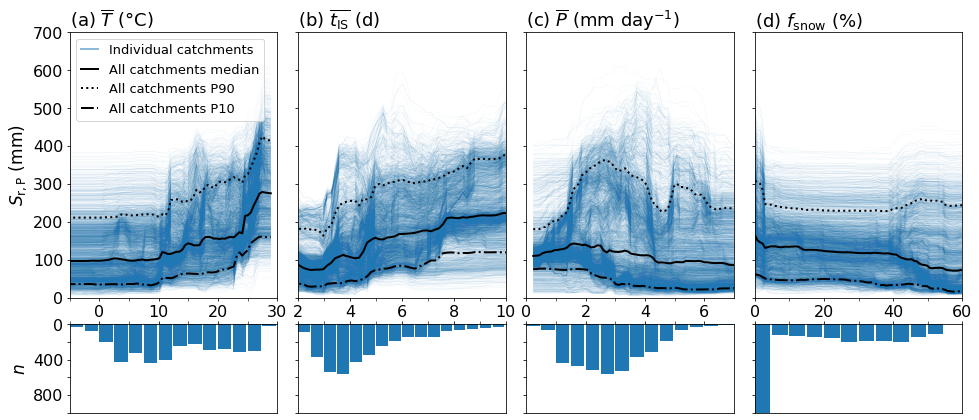

In [87]:
# SNOW COVER IPV ASI
# ices based on 0-1 range, plot limited range - interpolated
# var = ['$\overline{T}$','$\overline{t_\mathrm{IS}}$','$\overline{P}$','$I_\mathrm{AS}$']
var = ['$\overline{T}$','$\overline{t_\mathrm{IS}}$','$\overline{P}$','$f_{\mathrm{snow}}$']
units = ['$\degree$C','d','mm $\mathrm{day}^{-1}$','%']
abcd = ['(a)','(b)','(c)','(d)']

major_t = [0,10,20,30]
minor_t = [-5,5,15,25]
major_idu = [2,4,6,8,10]
minor_idu = [3,5,7,9]
major_p = [0,2,4,6]
minor_p = [1,3,5]
major_asi = [0,20,40,60]
minor_asi = [0,10,30,50]
majors = [major_t,major_idu,major_p,major_asi]
minors = [minor_t,minor_idu,minor_p,minor_asi]

xlims = [[-5,30],[2,10],[0,7],[0,60]]

binst = np.arange(-10,32.5,2.5)
binsidu = np.arange(2,10.5,0.5)
binsp = np.arange(0,7.5,0.5)
binsasi = np.arange(0,60,5)
binslist = [binst,binsidu,binsp,binsasi]

# plot pdp TEST ALL CVS COMBINED
X = np.concatenate([X_train,X_test])
ddf = pd.concat([df_train,df_test])
fig3, ax = plt.subplots(2,len(features), figsize=(16,7),gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.15,wspace=0.1)
for k in range(len(features)):
    ice0 = icsi[k]

    c = 'tab:blue'
    for i in ice0.index:
        ax[0,k].plot(ice0.columns.values, ice0.loc[i],color=c,alpha=0.5,linestyle='-',linewidth=0.05)    
    
    ax[0,k].plot(ice0.columns.values, -1*ice0.iloc[0],color=c,alpha=0.5,linestyle='-',linewidth=2,label='Individual catchments')
    ax[0,k].plot(ice0.columns.values, ice0.median(axis=0),color='k',linestyle='-',linewidth=2, label='All catchments median')
    ax[0,k].plot(ice0.columns.values, np.quantile(ice0,0.9,axis=0),color='k',linestyle=':',linewidth=2, label='All catchments P90')
    ax[0,k].plot(ice0.columns.values, np.quantile(ice0,0.1,axis=0),color='k',linestyle='-.',linewidth=2, label='All catchments P10')
    
    ax[0,k].set_title(f'{abcd[k]} {var[k]} ({units[k]})',size=18, loc='left')
    ax[0,0].set_ylabel('$S_\mathrm{r,P}$ (mm)',size=17)
    ax[0,k].set_ylim(0,700)
    ax[0,k].set_xlim(xlims[k])
    ax[0,k].tick_params(axis='both',labelsize=16)
    ax[0,k].tick_params(which='major', length=3)
    ax[0,k].tick_params(which='minor', length=3)
    ax[0,k].set_xticks(ticks=majors[k])
    ax[0,k].set_xticks(ticks=minors[k],minor=True)
    # if(k==3):
    #     ax[0,3].set_xticklabels(['0','0.1','0.2','0.3','0.4','0.5'])
    ax[0,k].set_yticks(ticks=[0,100,200,300,400,500,600,700])
    ax[0,k].set_yticklabels(['','','','','','','',''])
    ax[0,0].set_yticklabels(['0','100','200','300','400','500','600','700'])
    ax[0,0].legend(loc='upper left',fontsize=13,handlelength=1.3)
           
    bins = binslist[k]
    ax[1,k].hist(df.loc[:,features[k]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c)
    ax[1,k].invert_yaxis()
    ax[1,k].xaxis.tick_top()
    # ax[1,k].set_xlim(np.quantile(df.loc[:,features[k]],0.05),np.quantile(df.loc[:,features[k]],0.95))
    ax[1,k].axes.get_xaxis().set_ticklabels([])
    ax[1,0].set_ylabel('$n$',size=17)
    ax[1,k].tick_params(axis='both', labelsize=16)
    ax[1,k].set_ylim(1000,0)
    ax[1,k].set_yticks([0,200,400,600,800,1000])
    ax[1,k].set_yticklabels(['','','','','',''])
    ax[1,0].set_yticklabels(['0','','400','','800',''])
    ax[1,k].set_xlim(xlims[k])
    ax[1,k].set_xticks(ticks=majors[k])
    ax[1,k].set_xticks(ticks=minors[k],minor=True)
    ax[1,k].tick_params(which='major', length=3)
    ax[1,k].tick_params(which='minor', length=3)
    
# fig3.savefig(f'{work_dir}/output/regression/figures/interpretation/pdp_alltest_{mod}_fullrange_limx.jpg',bbox_inches='tight',dpi=600)
fig3.savefig(f'{fig_dir}/fig04.jpg',bbox_inches='tight',dpi=600)

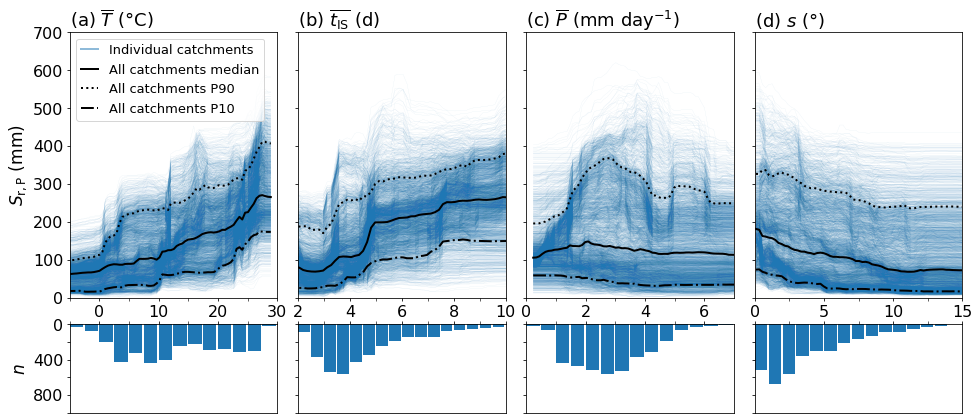

In [118]:
# SLOPE IPV ASI
# ices based on 0-1 range, plot limited range - interpolated
# var = ['$\overline{T}$','$\overline{t_\mathrm{IS}}$','$\overline{P}$','$I_\mathrm{AS}$']
var = ['$\overline{T}$','$\overline{t_\mathrm{IS}}$','$\overline{P}$','$s$']
units = ['$\degree$C','d','mm $\mathrm{day}^{-1}$','$\degree$']
abcd = ['(a)','(b)','(c)','(d)']

major_t = [0,10,20,30]
minor_t = [-5,5,15,25]
major_idu = [2,4,6,8,10]
minor_idu = [3,5,7,9]
major_p = [0,2,4,6]
minor_p = [1,3,5]
major_asi = [0,5,10,15]
minor_asi = [2.5,7.5,12.5]
majors = [major_t,major_idu,major_p,major_asi]
minors = [minor_t,minor_idu,minor_p,minor_asi]

xlims = [[-5,30],[2,10],[0,7],[0,15]]

binst = np.arange(-10,32.5,2.5)
binsidu = np.arange(2,10.5,0.5)
binsp = np.arange(0,7.5,0.5)
binsasi = np.arange(0,15,1)
binslist = [binst,binsidu,binsp,binsasi]

# plot pdp TEST ALL CVS COMBINED
X = np.concatenate([X_train,X_test])
ddf = pd.concat([df_train,df_test])
fig3, ax = plt.subplots(2,len(features), figsize=(16,7),gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.15,wspace=0.1)
for k in range(len(features)):
    ice0 = icsi[k]

    c = 'tab:blue'
    for i in ice0.index:
        ax[0,k].plot(ice0.columns.values, ice0.loc[i],color=c,alpha=0.5,linestyle='-',linewidth=0.05)    
    
    ax[0,k].plot(ice0.columns.values, -1*ice0.iloc[0],color=c,alpha=0.5,linestyle='-',linewidth=2,label='Individual catchments')
    ax[0,k].plot(ice0.columns.values, ice0.median(axis=0),color='k',linestyle='-',linewidth=2, label='All catchments median')
    ax[0,k].plot(ice0.columns.values, np.quantile(ice0,0.9,axis=0),color='k',linestyle=':',linewidth=2, label='All catchments P90')
    ax[0,k].plot(ice0.columns.values, np.quantile(ice0,0.1,axis=0),color='k',linestyle='-.',linewidth=2, label='All catchments P10')
    
    ax[0,k].set_title(f'{abcd[k]} {var[k]} ({units[k]})',size=18, loc='left')
    ax[0,0].set_ylabel('$S_\mathrm{r,P}$ (mm)',size=17)
    ax[0,k].set_ylim(0,700)
    ax[0,k].set_xlim(xlims[k])
    ax[0,k].tick_params(axis='both',labelsize=16)
    ax[0,k].tick_params(which='major', length=3)
    ax[0,k].tick_params(which='minor', length=3)
    ax[0,k].set_xticks(ticks=majors[k])
    ax[0,k].set_xticks(ticks=minors[k],minor=True)
    # if(k==3):
    #     ax[0,3].set_xticklabels(['0','0.1','0.2','0.3','0.4','0.5'])
    ax[0,k].set_yticks(ticks=[0,100,200,300,400,500,600,700])
    ax[0,k].set_yticklabels(['','','','','','','',''])
    ax[0,0].set_yticklabels(['0','100','200','300','400','500','600','700'])
    ax[0,0].legend(loc='upper left',fontsize=13,handlelength=1.3)
           
    bins = binslist[k]
    ax[1,k].hist(df.loc[:,features[k]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c)
    ax[1,k].invert_yaxis()
    ax[1,k].xaxis.tick_top()
    # ax[1,k].set_xlim(np.quantile(df.loc[:,features[k]],0.05),np.quantile(df.loc[:,features[k]],0.95))
    ax[1,k].axes.get_xaxis().set_ticklabels([])
    ax[1,0].set_ylabel('$n$',size=17)
    ax[1,k].tick_params(axis='both', labelsize=16)
    ax[1,k].set_ylim(1000,0)
    ax[1,k].set_yticks([0,200,400,600,800,1000])
    ax[1,k].set_yticklabels(['','','','','',''])
    ax[1,0].set_yticklabels(['0','','400','','800',''])
    ax[1,k].set_xlim(xlims[k])
    ax[1,k].set_xticks(ticks=majors[k])
    ax[1,k].set_xticks(ticks=minors[k],minor=True)
    ax[1,k].tick_params(which='major', length=3)
    ax[1,k].tick_params(which='minor', length=3)
    
# fig3.savefig(f'{work_dir}/output/regression/figures/interpretation/pdp_alltest_{mod}_fullrange_limx.jpg',bbox_inches='tight',dpi=600)
fig3.savefig(f'{fig_dir}/fig04.jpg',bbox_inches='tight',dpi=600)

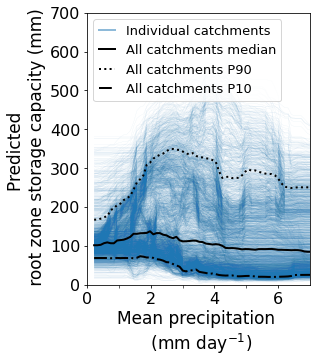

In [58]:
# P only

# plot pdp TEST ALL CVS COMBINED
X = np.concatenate([X_train,X_test])
ddf = pd.concat([df_train,df_test])
fig3, ax = plt.subplots(1,1, figsize=(4,5))
k=2
ice0 = icsi[k]

c = 'tab:blue'
for i in ice0.index:
    ax.plot(ice0.columns.values, ice0.loc[i],color=c,alpha=0.5,linestyle='-',linewidth=0.05)    

ax.plot(ice0.columns.values, -1*ice0.iloc[0],color=c,alpha=0.5,linestyle='-',linewidth=2,label='Individual catchments')
ax.plot(ice0.columns.values, ice0.median(axis=0),color='k',linestyle='-',linewidth=2, label='All catchments median')
ax.plot(ice0.columns.values, np.quantile(ice0,0.9,axis=0),color='k',linestyle=':',linewidth=2, label='All catchments P90')
ax.plot(ice0.columns.values, np.quantile(ice0,0.1,axis=0),color='k',linestyle='-.',linewidth=2, label='All catchments P10')

ax.set_xlabel(f'{abcd[k]} \n ({units[k]})',size=17, loc='center')
ax.set_ylabel('Predicted \n root zone storage capacity (mm)',size=17)
ax.set_ylim(0,700)
ax.set_xlim(xlims[k])
ax.tick_params(axis='both',labelsize=16)
ax.tick_params(which='major', length=3)
ax.tick_params(which='minor', length=3)
ax.set_xticks(ticks=majors[k])
ax.set_xticks(ticks=minors[k],minor=True)
ax.set_yticks(ticks=[0,100,200,300,400,500,600,700])
ax.set_yticklabels(['','','','','','','',''])
ax.set_yticklabels(['0','100','200','300','400','500','600','700'])
ax.legend(loc='upper left',fontsize=13,handlelength=1.3)
        
fig3.savefig(f'{fig_dir}/fig04_p.png',bbox_inches='tight',dpi=600,transparent=True)

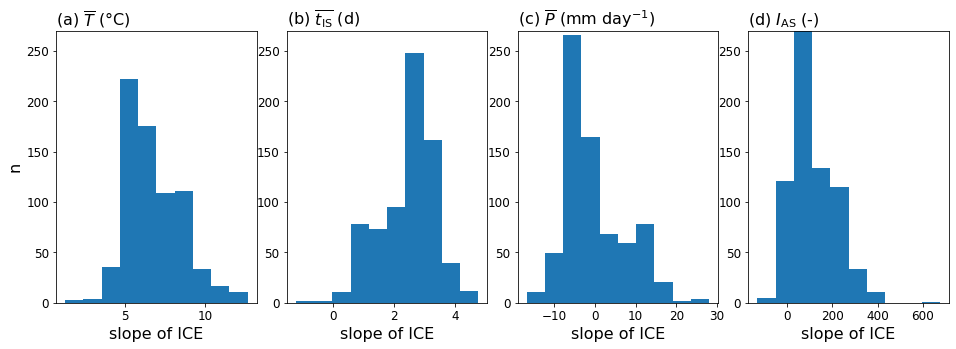

In [59]:
# histograms of ICE slopes --> do different groups really appear?
# plot pdp TEST ALL CVS COMBINED
X = np.concatenate([X_train,X_test])
ddf = pd.concat([df_train,df_test])
fig3, ax = plt.subplots(1,len(features), figsize=(16,5))
plt.subplots_adjust(wspace=0.15)
for k in range(len(features)):
    ice0 = ics[0][k]
    ice1 = ics[1][k]
    ice2 = ics[2][k]
    ice3 = ics[3][k]
    ice4 = ics[4][k]
    
    pdp0 = ps[0][k]
    pdp1 = ps[1][k]
    pdp2 = ps[2][k]
    pdp3 = ps[3][k]
    pdp4 = ps[4][k]

    c = 'tab:blue'
    slp0 = (ice0.iloc[:,-1] - ice0.iloc[:,0])/(ice0.columns[-1] - ice0.columns[0])
    slp1 = (ice1.iloc[:,-1] - ice1.iloc[:,0])/(ice1.columns[-1] - ice1.columns[0])
    slp2 = (ice2.iloc[:,-1] - ice2.iloc[:,0])/(ice2.columns[-1] - ice2.columns[0])
    slp3 = (ice3.iloc[:,-1] - ice3.iloc[:,0])/(ice3.columns[-1] - ice3.columns[0])
    slp4 = (ice4.iloc[:,-1] - ice4.iloc[:,0])/(ice4.columns[-1] - ice4.columns[0])
    
    ax[k].hist(slp0)
    ax[k].set_title(f'{abcd[k]} {var[k]} ({units[k]})',size=16, loc='left')
    ax[0].set_ylabel('n',size=16)
    ax[k].set_xlabel('slope of ICE',size=16)
    ax[k].set_ylim(0,270)
    ax[k].tick_params(axis='both',labelsize=12)



In [60]:
import matplotlib.pyplot as plt
import datashader as ds
import datashader.transfer_functions as tf
from datashader.mpl_ext import dsshow, alpha_colormap

In [61]:
# for the 5cvs the lines have different x-values so we cannot combine them all together in one dataframe and make density plot
# solution might be to fix same min and max point, and calculate pd with percentiles=[0,1] so it is constant
# density figure below is not very clear

In [62]:
# w = ics[0][3]
# points = len(w.columns)
# n = len(w)
# time = np.linspace(0, 1, points)
# w.index = pd.RangeIndex(0,len(w),1)
# w.columns = pd.RangeIndex(0,points,1)

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# width = 250
# height = 400
# cvs = ds.Canvas(plot_height=height, plot_width=width)
# agg = cvs.line(w, x=time, y=list(range(points)), agg=ds.count(), axis=1, line_width=0)
# img = tf.shade(agg, how='eq_hist',cmap=cm.get_cmap('YlGnBu'))
# ax.imshow(img.to_pil())
# ax.set_xticks(np.arange(0,width,50))
# ax.set_yticks(np.arange(50,height+50,50))
# ax.set_yticklabels([700,600,500,400,300,200,100,0])

# # ax.set_xticklabels([0,
# fig.savefig(f'{work_dir}/output/regression/figures/interpretation/test.jpg',bbox_inches='tight',dpi=300)


## MAKE MANUAL SPLITS

In [210]:
c1 = '#FF1F5B'
c2 = '#009ADE'
c3 = '#AF58BA'
c4 = '#FFC61E'

In [211]:
def run_pca(gr1,gr2):
    f = f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv'
    dfp = pd.read_csv(f,index_col=0)
    features = ['idu_mean','t_mean','asi','p_mean'] 
    ff = features
    ff.append('sr_20')
    dfp = dfp[ff]
    dfp = dfp.loc[ice.index]
    dfp.loc[gr1,'gr'] = 0
    dfp.loc[gr2,'gr'] = 1

    xx = dfp[features]
    xx = StandardScaler().fit_transform(xx) #standardize all values
    xx = pd.DataFrame(xx,columns=ff)
    pca = PCA(n_components=len(ff))
    components = pca.fit_transform(xx)
    loadings = pca.components_ #eigenvector, length represents variance var explains

    # Create dataframe
    pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])
    pca_df_scaled = pca_df.copy()
    scaler_df = pca_df[['PC1', 'PC2']]
    scaler = 1 / (scaler_df.max() - scaler_df.min()) # WAAROM DIT?

    for index in scaler.index:
        pca_df_scaled[index] *= scaler[index]
    per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

    xs = loadings[0]
    ys = loadings[1]
    ld_df = pd.DataFrame(index=ff, columns=['xs','ys'])
    ld_df['xs'] = loadings[0]
    ld_df['ys'] = loadings[1]
    ld_df['len'] = np.sqrt(loadings[0]**2+loadings[1]**2)
    return (pca_df_scaled, ld_df, ff,dfp,per_var)

def run_pca2(gr1,gr2,gr3):
    f = f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv'
    dfp = pd.read_csv(f,index_col=0)
    features = ['idu_mean','t_mean','asi','p_mean'] 
    ff = features
    ff.append('sr_20')
    dfp = dfp[ff]
    dfp = dfp.loc[ice.index]
    dfp.loc[gr1,'gr'] = 0
    dfp.loc[gr2,'gr'] = 1
    dfp.loc[gr3,'gr'] = 2

    xx = dfp[features]
    xx = StandardScaler().fit_transform(xx) #standardize all values
    xx = pd.DataFrame(xx,columns=ff)
    pca = PCA(n_components=len(ff))
    components = pca.fit_transform(xx)
    loadings = pca.components_ #eigenvector, length represents variance var explains

    # Create dataframe
    pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])
    pca_df_scaled = pca_df.copy()
    scaler_df = pca_df[['PC1', 'PC2']]
    scaler = 1 / (scaler_df.max() - scaler_df.min()) # WAAROM DIT?

    for index in scaler.index:
        pca_df_scaled[index] *= scaler[index]
    per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

    xs = loadings[0]
    ys = loadings[1]
    ld_df = pd.DataFrame(index=ff, columns=['xs','ys'])
    ld_df['xs'] = loadings[0]
    ld_df['ys'] = loadings[1]
    ld_df['len'] = np.sqrt(loadings[0]**2+loadings[1]**2)
    return (pca_df_scaled, ld_df, ff,dfp,per_var)

In [213]:
# get ices
# idu_mean
k = 1
ice_idu0 = ics[0][k]
ice_idu1 = ics[1][k]
ice_idu2 = ics[2][k]
ice_idu3 = ics[3][k]
ice_idu4 = ics[4][k]

pdp_idu0 = ps[0][k]
pdp_idu1 = ps[1][k]
pdp_idu2 = ps[2][k]
pdp_idu3 = ps[3][k]
pdp_idu4 = ps[4][k]

# t_mean
k = 0 
ice_t0 = ics[0][k]
ice_t1 = ics[1][k]
ice_t2 = ics[2][k]
ice_t3 = ics[3][k]
ice_t4 = ics[4][k]

pdp_t0 = ps[0][k]
pdp_t1 = ps[1][k]
pdp_t2 = ps[2][k]
pdp_t3 = ps[3][k]
pdp_t4 = ps[4][k]

# asi
k = 3 
ice_asi0 = ics[0][k]
ice_asi1 = ics[1][k]
ice_asi2 = ics[2][k]
ice_asi3 = ics[3][k]
ice_asi4 = ics[4][k]

pdp_asi0 = ps[0][k]
pdp_asi1 = ps[1][k]
pdp_asi2 = ps[2][k]
pdp_asi3 = ps[3][k]
pdp_asi4 = ps[4][k]

# p_mean
k = 2
ice_p0 = ics[0][k]
ice_p1 = ics[1][k]
ice_p2 = ics[2][k]
ice_p3 = ics[3][k]
ice_p4 = ics[4][k]

pdp_p0 = ps[0][k]
pdp_p1 = ps[1][k]
pdp_p2 = ps[2][k]
pdp_p3 = ps[3][k]
pdp_p4 = ps[4][k]


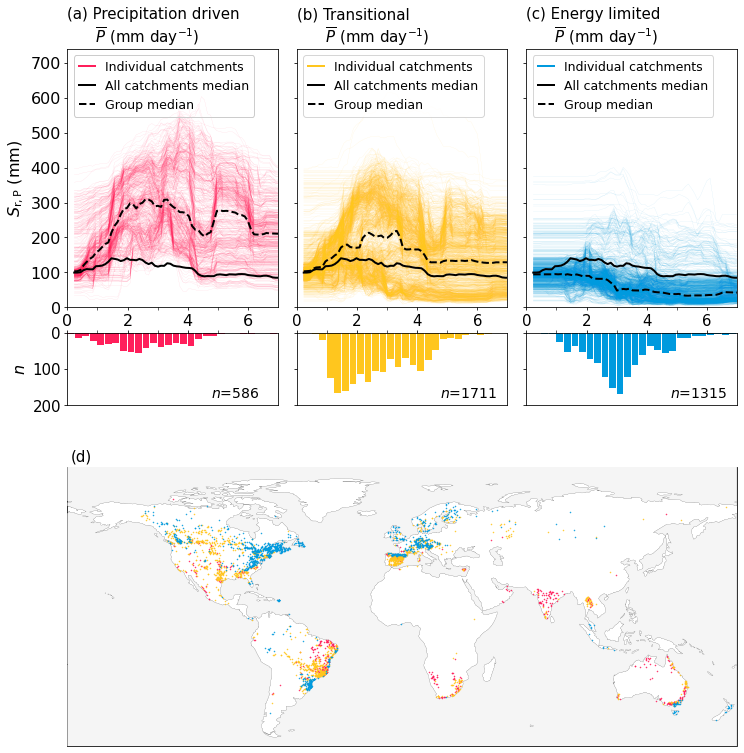

In [214]:
# make plots - ices - pmean - 3 different regimes - interpolated
var = ['t_mean','idu_mean','p_mean','asi']
var2 = ['$\overline{T}$','$I_\mathrm{ISD}$','$\overline{P}$','$I_\mathrm{AS}$']
pcavar = ['$\overline{T}$','$I_\mathrm{ISD}$','$\overline{P}$','$I_\mathrm{AS}$','$S_\mathrm{r}$']
units = ['$\degree$C','d','mm $\mathrm{day}^{-1}$','-']
major_t = [0,10,20,30]
minor_t = [-5,5,15,25]
major_idu = [2,4,6,8,10]
minor_idu = [3,5,7,9]
major_p = [0,2,4,6]
minor_p = [1,3,5]
major_asi = [0,0.1,0.2,0.3,0.4,0.5]
minor_asi = [0.05,0.15,0.25,0.35,0.45]
majors = [major_t,major_idu,major_p,major_asi]
minors = [minor_t,minor_idu,minor_p,minor_asi]

xlims = [[-5,30],[2,10],[0,7],[0,0.5]]

binst = np.arange(-10,32.5,2.5)
binsidu = np.arange(2,10.5,0.5)
binsp = np.arange(0,7.5,0.25)
binsasi = np.arange(0,0.525,0.025)
binslist = [binst,binsidu,binsp,binsasi]

m=2
k=2
grs1=[]
grs2=[]
grs3=[]
grs4=[]
fig = plt.figure(figsize=(12,15))
gs = fig.add_gridspec(ncols=3, nrows=5,height_ratios=[2.5,1,0.7,0.2,5],width_ratios=[1,1,1])
ax1 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax7 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[2:4, 0])
ax4 = fig.add_subplot(gs[2:4, 1])
ax8 = fig.add_subplot(gs[2:4, 2])
ax6 = fig.add_subplot(gs[4,:],projection=ccrs.PlateCarree())

# ax1.set_title(f'(a)  {var2[m]} ({units[m]}) \n            ',size=15, loc='left')
ax1.set_title(f'(a) Precipitation driven \n      {var2[m]} ({units[m]})',size=15, loc='left')
ax1.set_ylabel('$S_\mathrm{r,P}$ (mm)',size=16)
ax1.set_ylim(0,740)
ax1.tick_params(axis='both', labelsize=15)  
ax1.set_xlim(xlims[m])
ax1.tick_params(axis='both',labelsize=16)
ax1.tick_params(which='major', length=3)
ax1.tick_params(which='minor', length=3)
ax1.set_xticks(ticks=majors[k])
ax1.set_xticks(ticks=minors[k],minor=True)
ax1.set_yticks([0,100,200,300,400,500,600,700])
ax1.set_yticklabels(['','','','','','','',''])
ax1.set_yticklabels(['0','100','200','300','400','500','600','700'])

ax3.set_title(f'(b) Transitional \n      {var2[m]} ({units[m]})',size=15, loc='left')
ax3.set_ylim(0,740)
ax3.tick_params(axis='both', labelsize=15)  
ax3.set_xlim(xlims[m])
ax3.tick_params(axis='both',labelsize=16)
ax3.tick_params(which='major', length=3)
ax3.tick_params(which='minor', length=3)
ax3.set_xticks(ticks=majors[k])
ax3.set_xticks(ticks=minors[k],minor=True)
ax3.tick_params(axis='both', labelsize=15)
ax3.set_yticks([0,100,200,300,400,500,600,700])
ax3.set_yticklabels(['','','','','','','',''])

ax7.set_title(f'(c) Energy limited \n      {var2[m]} ({units[m]})',size=15, loc='left')
ax7.set_ylim(0,740)
ax7.tick_params(axis='both', labelsize=15)  
ax7.set_xlim(xlims[m])
ax7.tick_params(axis='both',labelsize=16)
ax7.tick_params(which='major', length=3)
ax7.tick_params(which='minor', length=3)
ax7.set_xticks(ticks=majors[k])
ax7.set_xticks(ticks=minors[k],minor=True)
ax7.tick_params(axis='both', labelsize=15)
ax7.set_yticks([0,100,200,300,400,500,600,700])
ax7.set_yticklabels(['','','','','','','',''])

ax6.coastlines(linewidth=0.1)
ax6.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax6.set_global()
ax6.set_xlim(-180,180)
ax6.set_ylim(-60,90)
ax6.text(-178,93, f'(d)',zorder=101,size=15)
    
plt.subplots_adjust(wspace=0.09,hspace=-0.2)
ice_p = icsi[m]

# define groups
pos = []
neg = []
slp = (ice_p.iloc[:,-1] - ice_p.iloc[:,0])/(ice_p.columns[-1] - ice_p.columns[0])
for i in ice_p.index:
    if (slp.loc[i]>0):
        pos.append(i)
    if (slp.loc[i]<0):
        neg.append(i)

pm = slp.loc[pos].mean()
nm = slp.loc[neg].mean()
p1 = slp[slp>pm].index
p2 = slp[slp<pm].index

p = ice_p.index
p1 = []
p2 = []
p3 = []
p4 = []
grr = []
r = []
rr = []

for i in p:
    if ((ice_p.loc[i].idxmax()>3.2)&((ice_p.loc[i].iloc[30] - ice_p.loc[i].iloc[0])/(ice_p.columns[30] - ice_p.columns[0]) > 20)&(ice_p.loc[i].iloc[0]>20)):
        p1.append(i)
    else:
        if ((ice_p.loc[i].idxmax()>1.2)&((ice_p.loc[i].iloc[23] - ice_p.loc[i].iloc[0])/(ice_p.columns[23] - ice_p.columns[0]) > 6)):
            p2.append(i)
        else:
            if ((ice_p.loc[i].iloc[12] - ice_p.loc[i].iloc[0])/(ice_p.columns[12] - ice_p.columns[0]) > 8):
                p2.append(i)
            else:
                p3.append(i)
gr1 = p1
gr2 = p2
gr3 = p3
ice = ice_p
ylim = 200
mm = 0
grs1.append(gr1)
grs2.append(gr2)
grs3.append(gr3)
if (len(gr1)>0):
    gr = gr1
    j = 0
    for i in gr:
        ax1.plot(ice.columns.values, ice.loc[i],color=c1,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
    ax1.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
    ax1.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

if (len(gr2)>0):
    gr = gr2
    j = 1
    for i in gr:
        ax3.plot(ice.columns.values, ice.loc[i],color=c4,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
    ax3.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
    ax3.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

if (len(gr3)>0):
    gr = gr3
    j = 2
    for i in gr:
        ax7.plot(ice.columns.values, ice.loc[i],color=c2,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
    ax7.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
    ax7.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

ddf = df.loc[ice.index]
ax6.plot(ddf.loc[gr1].lon, ddf.loc[gr1].lat,'o', markeredgecolor=c1, markerfacecolor=c1,markersize=0.5,zorder=102)
ax6.plot(ddf.loc[gr2].lon, ddf.loc[gr2].lat,'o', markeredgecolor=c4, markerfacecolor=c4,markersize=0.5,zorder=102)
ax6.plot(ddf.loc[gr3].lon, ddf.loc[gr3].lat,'o', markeredgecolor=c2, markerfacecolor=c2,markersize=0.5,zorder=102)

bins = binslist[m]

ax2.hist(df.loc[gr1,features[m]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c1)
ax2.invert_yaxis()
ax2.xaxis.tick_top()
ax2.axes.get_xaxis().set_ticklabels([])
ax2.set_ylabel('$n$',size=16)
ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylim(ylim,0)
ax2.text(ice.columns.values[-56],ylim-20,f'$n$={len(gr1)}',size=14,zorder=10)
ax2.set_xlim(xlims[m])
ax2.set_xticks(ticks=majors[m])
ax2.set_xticks(ticks=minors[m],minor=True)
ax2.tick_params(which='major', length=3)
ax2.tick_params(which='minor', length=3)
# ax2.set_xlabel(f'{var2[m]} ({units[m]})',size=16)

ax4.hist(df.loc[gr2,features[m]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c4)
ax4.invert_yaxis()
ax4.xaxis.tick_top()
ax4.axes.get_xaxis().set_ticklabels([])
ax4.tick_params(axis='both', labelsize=15)
ax4.set_ylim(ylim,0)
ax4.set_yticklabels([])
ax4.text(ice.columns.values[-56],ylim-20,f'$n$={len(gr2)}',size=14,zorder=10)
ax4.set_xlim(xlims[m])
ax4.set_xticks(ticks=majors[m])
ax4.set_xticks(ticks=minors[m],minor=True)
ax4.tick_params(which='major', length=3)
ax4.tick_params(which='minor', length=3)

ax8.hist(df.loc[gr3,features[m]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c2)
ax8.invert_yaxis()
ax8.xaxis.tick_top()
ax8.axes.get_xaxis().set_ticklabels([])
ax8.tick_params(axis='both', labelsize=15)
ax8.set_ylim(ylim,0)
ax8.set_yticklabels([])
ax8.text(ice.columns.values[-56],ylim-20,f'$n$={len(gr3)}',size=14,zorder=10)
ax8.set_xlim(xlims[m])
ax8.set_xticks(ticks=majors[m])
ax8.set_xticks(ticks=minors[m],minor=True)
ax8.tick_params(which='major', length=3)
ax8.tick_params(which='minor', length=3)

ax1.plot([-1,-1],[-4,-4],color=c1,linestyle='-',linewidth=2, label='Individual catchments')
ax1.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
ax1.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')
ax3.plot([-1,-1],[-4,-4],color=c4,linestyle='-',linewidth=2, label='Individual catchments')
ax3.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
ax3.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')
ax7.plot([-1,-1],[-4,-4],color=c2,linestyle='-',linewidth=2, label='Individual catchments')
ax7.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
ax7.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')

legend=ax1.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0))
ax3.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
ax7.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
# fig.savefig(f'{work_dir}/output/regression/figures/interpretation/ice_splitted_{var[m]}_3splitsv2.jpg',bbox_inches='tight',dpi=300)
fig.savefig(f'{fig_dir}/fig05.jpg',bbox_inches='tight',dpi=300)

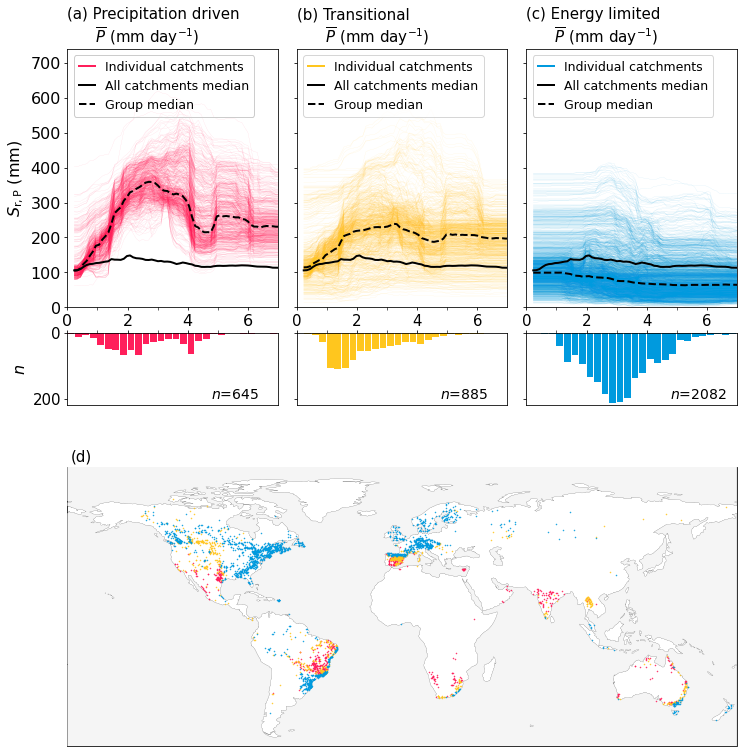

In [145]:
# make plots - ices - pmean - 3 different regimes - interpolated - SLOPE - UPDATED SPLIT CRITERIA
var = ['t_mean','idu_mean','p_mean','asi']
var2 = ['$\overline{T}$','$I_\mathrm{ISD}$','$\overline{P}$','$I_\mathrm{AS}$']
pcavar = ['$\overline{T}$','$I_\mathrm{ISD}$','$\overline{P}$','$I_\mathrm{AS}$','$S_\mathrm{r}$']
units = ['$\degree$C','d','mm $\mathrm{day}^{-1}$','-']
major_t = [0,10,20,30]
minor_t = [-5,5,15,25]
major_idu = [2,4,6,8,10]
minor_idu = [3,5,7,9]
major_p = [0,2,4,6]
minor_p = [1,3,5]
major_asi = [0,0.1,0.2,0.3,0.4,0.5]
minor_asi = [0.05,0.15,0.25,0.35,0.45]
majors = [major_t,major_idu,major_p,major_asi]
minors = [minor_t,minor_idu,minor_p,minor_asi]

xlims = [[-5,30],[2,10],[0,7],[0,0.5]]

binst = np.arange(-10,32.5,2.5)
binsidu = np.arange(2,10.5,0.5)
binsp = np.arange(0,7.5,0.25)
binsasi = np.arange(0,0.525,0.025)
binslist = [binst,binsidu,binsp,binsasi]

m=2
k=2
grs1=[]
grs2=[]
grs3=[]
grs4=[]
fig = plt.figure(figsize=(12,15))
gs = fig.add_gridspec(ncols=3, nrows=5,height_ratios=[2.5,1,0.7,0.2,5],width_ratios=[1,1,1])
ax1 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax7 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[2:4, 0])
ax4 = fig.add_subplot(gs[2:4, 1])
ax8 = fig.add_subplot(gs[2:4, 2])
ax6 = fig.add_subplot(gs[4,:],projection=ccrs.PlateCarree())

# ax1.set_title(f'(a)  {var2[m]} ({units[m]}) \n            ',size=15, loc='left')
ax1.set_title(f'(a) Precipitation driven \n      {var2[m]} ({units[m]})',size=15, loc='left')
ax1.set_ylabel('$S_\mathrm{r,P}$ (mm)',size=16)
ax1.set_ylim(0,740)
ax1.tick_params(axis='both', labelsize=15)  
ax1.set_xlim(xlims[m])
ax1.tick_params(axis='both',labelsize=16)
ax1.tick_params(which='major', length=3)
ax1.tick_params(which='minor', length=3)
ax1.set_xticks(ticks=majors[k])
ax1.set_xticks(ticks=minors[k],minor=True)
ax1.set_yticks([0,100,200,300,400,500,600,700])
ax1.set_yticklabels(['','','','','','','',''])
ax1.set_yticklabels(['0','100','200','300','400','500','600','700'])

ax3.set_title(f'(b) Transitional \n      {var2[m]} ({units[m]})',size=15, loc='left')
ax3.set_ylim(0,740)
ax3.tick_params(axis='both', labelsize=15)  
ax3.set_xlim(xlims[m])
ax3.tick_params(axis='both',labelsize=16)
ax3.tick_params(which='major', length=3)
ax3.tick_params(which='minor', length=3)
ax3.set_xticks(ticks=majors[k])
ax3.set_xticks(ticks=minors[k],minor=True)
ax3.tick_params(axis='both', labelsize=15)
ax3.set_yticks([0,100,200,300,400,500,600,700])
ax3.set_yticklabels(['','','','','','','',''])

ax7.set_title(f'(c) Energy limited \n      {var2[m]} ({units[m]})',size=15, loc='left')
ax7.set_ylim(0,740)
ax7.tick_params(axis='both', labelsize=15)  
ax7.set_xlim(xlims[m])
ax7.tick_params(axis='both',labelsize=16)
ax7.tick_params(which='major', length=3)
ax7.tick_params(which='minor', length=3)
ax7.set_xticks(ticks=majors[k])
ax7.set_xticks(ticks=minors[k],minor=True)
ax7.tick_params(axis='both', labelsize=15)
ax7.set_yticks([0,100,200,300,400,500,600,700])
ax7.set_yticklabels(['','','','','','','',''])

ax6.coastlines(linewidth=0.1)
ax6.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax6.set_global()
ax6.set_xlim(-180,180)
ax6.set_ylim(-60,90)
ax6.text(-178,93, f'(d)',zorder=101,size=15)
    
plt.subplots_adjust(wspace=0.09,hspace=-0.2)
ice_p = icsi[m]

# define groups
pos = []
neg = []
slp = (ice_p.iloc[:,-1] - ice_p.iloc[:,0])/(ice_p.columns[-1] - ice_p.columns[0])
for i in ice_p.index:
    if (slp.loc[i]>0):
        pos.append(i)
    if (slp.loc[i]<0):
        neg.append(i)

pm = slp.loc[pos].mean()
nm = slp.loc[neg].mean()
p1 = slp[slp>pm].index
p2 = slp[slp<pm].index

p = ice_p.index
p1 = []
p2 = []
p3 = []
p4 = []
grr = []
r = []
rr = []

# for i in p:
#     if ((ice_p.loc[i].idxmax()>3.2)&((ice_p.loc[i].iloc[30] - ice_p.loc[i].iloc[0])/(ice_p.columns[30] - ice_p.columns[0]) > 20)&(ice_p.loc[i].iloc[0]>20)):
#         p1.append(i)
#     else:
#         if ((ice_p.loc[i].idxmax()>1.2)&((ice_p.loc[i].iloc[23] - ice_p.loc[i].iloc[0])/(ice_p.columns[23] - ice_p.columns[0]) > 6)):
#             p2.append(i)
#         else:
#             if ((ice_p.loc[i].iloc[12] - ice_p.loc[i].iloc[0])/(ice_p.columns[12] - ice_p.columns[0]) > 8):
#                 p2.append(i)
#             else:
#                 p3.append(i)
                
                
for i in p:
    if((ice_p.loc[i].iloc[30] - ice_p.loc[i].iloc[0])/(ice_p.columns[30] - ice_p.columns[0]) < 5):
        p3.append(i)
    else:
        if((ice_p.loc[i].iloc[30] - ice_p.loc[i].iloc[0])/(ice_p.columns[30] - ice_p.columns[0]) > 60):
            p1.append(i)
        else:
            p2.append(i)

gr1 = p1
gr2 = p2
gr3 = p3
ice = ice_p
ylim = 220
mm = 0
grs1.append(gr1)
grs2.append(gr2)
grs3.append(gr3)
if (len(gr1)>0):
    gr = gr1
    j = 0
    for i in gr:
        ax1.plot(ice.columns.values, ice.loc[i],color=c1,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
    ax1.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
    ax1.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

if (len(gr2)>0):
    gr = gr2
    j = 1
    for i in gr:
        ax3.plot(ice.columns.values, ice.loc[i],color=c4,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
    ax3.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
    ax3.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

if (len(gr3)>0):
    gr = gr3
    j = 2
    for i in gr:
        ax7.plot(ice.columns.values, ice.loc[i],color=c2,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
    ax7.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
    ax7.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

ddf = df.loc[ice.index]
ax6.plot(ddf.loc[gr1].lon, ddf.loc[gr1].lat,'o', markeredgecolor=c1, markerfacecolor=c1,markersize=0.5,zorder=102)
ax6.plot(ddf.loc[gr2].lon, ddf.loc[gr2].lat,'o', markeredgecolor=c4, markerfacecolor=c4,markersize=0.5,zorder=102)
ax6.plot(ddf.loc[gr3].lon, ddf.loc[gr3].lat,'o', markeredgecolor=c2, markerfacecolor=c2,markersize=0.5,zorder=102)

bins = binslist[m]

ax2.hist(df.loc[gr1,features[m]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c1)
ax2.invert_yaxis()
ax2.xaxis.tick_top()
ax2.axes.get_xaxis().set_ticklabels([])
ax2.set_ylabel('$n$',size=16)
ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylim(ylim,0)
ax2.text(ice.columns.values[-56],ylim-20,f'$n$={len(gr1)}',size=14,zorder=10)
ax2.set_xlim(xlims[m])
ax2.set_xticks(ticks=majors[m])
ax2.set_xticks(ticks=minors[m],minor=True)
ax2.tick_params(which='major', length=3)
ax2.tick_params(which='minor', length=3)
# ax2.set_xlabel(f'{var2[m]} ({units[m]})',size=16)

ax4.hist(df.loc[gr2,features[m]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c4)
ax4.invert_yaxis()
ax4.xaxis.tick_top()
ax4.axes.get_xaxis().set_ticklabels([])
ax4.tick_params(axis='both', labelsize=15)
ax4.set_ylim(ylim,0)
ax4.set_yticklabels([])
ax4.text(ice.columns.values[-56],ylim-20,f'$n$={len(gr2)}',size=14,zorder=10)
ax4.set_xlim(xlims[m])
ax4.set_xticks(ticks=majors[m])
ax4.set_xticks(ticks=minors[m],minor=True)
ax4.tick_params(which='major', length=3)
ax4.tick_params(which='minor', length=3)

ax8.hist(df.loc[gr3,features[m]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c2)
ax8.invert_yaxis()
ax8.xaxis.tick_top()
ax8.axes.get_xaxis().set_ticklabels([])
ax8.tick_params(axis='both', labelsize=15)
ax8.set_ylim(ylim,0)
ax8.set_yticklabels([])
ax8.text(ice.columns.values[-56],ylim-20,f'$n$={len(gr3)}',size=14,zorder=10)
ax8.set_xlim(xlims[m])
ax8.set_xticks(ticks=majors[m])
ax8.set_xticks(ticks=minors[m],minor=True)
ax8.tick_params(which='major', length=3)
ax8.tick_params(which='minor', length=3)

ax1.plot([-1,-1],[-4,-4],color=c1,linestyle='-',linewidth=2, label='Individual catchments')
ax1.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
ax1.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')
ax3.plot([-1,-1],[-4,-4],color=c4,linestyle='-',linewidth=2, label='Individual catchments')
ax3.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
ax3.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')
ax7.plot([-1,-1],[-4,-4],color=c2,linestyle='-',linewidth=2, label='Individual catchments')
ax7.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
ax7.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')

legend=ax1.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0))
ax3.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
ax7.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
# fig.savefig(f'{work_dir}/output/regression/figures/interpretation/ice_splitted_{var[m]}_3splitsv2.jpg',bbox_inches='tight',dpi=300)
fig.savefig(f'{fig_dir}/fig05.jpg',bbox_inches='tight',dpi=300)

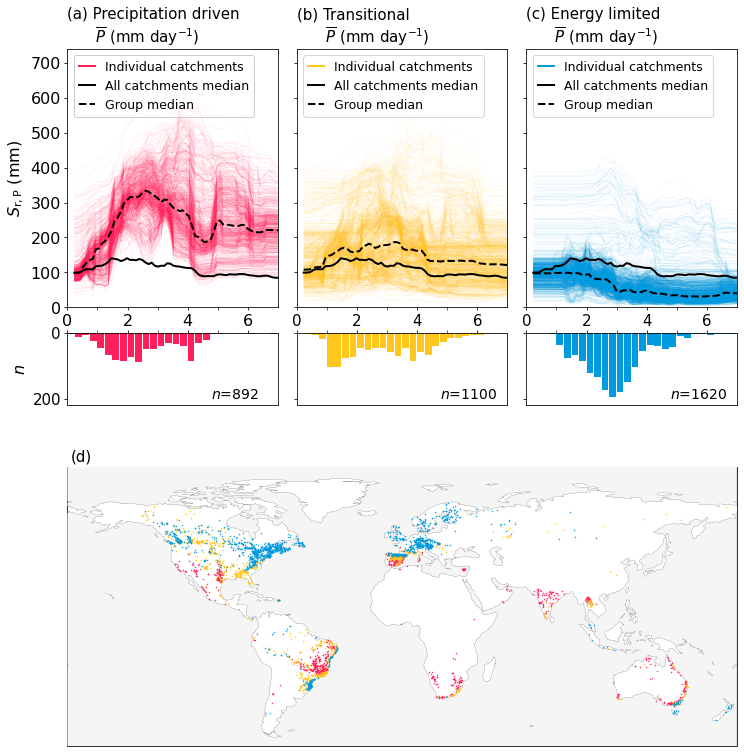

In [216]:
# make plots - ices - pmean - 3 different regimes - interpolated - 3 VARIABLES ONLY - UPDATED SPLIT CRITERIA
var = ['t_mean','idu_mean','p_mean','asi']
var2 = ['$\overline{T}$','$I_\mathrm{ISD}$','$\overline{P}$','$I_\mathrm{AS}$']
pcavar = ['$\overline{T}$','$I_\mathrm{ISD}$','$\overline{P}$','$I_\mathrm{AS}$','$S_\mathrm{r}$']
units = ['$\degree$C','d','mm $\mathrm{day}^{-1}$','-']
major_t = [0,10,20,30]
minor_t = [-5,5,15,25]
major_idu = [2,4,6,8,10]
minor_idu = [3,5,7,9]
major_p = [0,2,4,6]
minor_p = [1,3,5]
major_asi = [0,0.1,0.2,0.3,0.4,0.5]
minor_asi = [0.05,0.15,0.25,0.35,0.45]
majors = [major_t,major_idu,major_p,major_asi]
minors = [minor_t,minor_idu,minor_p,minor_asi]

xlims = [[-5,30],[2,10],[0,7],[0,0.5]]

binst = np.arange(-10,32.5,2.5)
binsidu = np.arange(2,10.5,0.5)
binsp = np.arange(0,7.5,0.25)
binsasi = np.arange(0,0.525,0.025)
binslist = [binst,binsidu,binsp,binsasi]

m=2
k=2
grs1=[]
grs2=[]
grs3=[]
grs4=[]
fig = plt.figure(figsize=(12,15))
gs = fig.add_gridspec(ncols=3, nrows=5,height_ratios=[2.5,1,0.7,0.2,5],width_ratios=[1,1,1])
ax1 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax7 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[2:4, 0])
ax4 = fig.add_subplot(gs[2:4, 1])
ax8 = fig.add_subplot(gs[2:4, 2])
ax6 = fig.add_subplot(gs[4,:],projection=ccrs.PlateCarree())

# ax1.set_title(f'(a)  {var2[m]} ({units[m]}) \n            ',size=15, loc='left')
ax1.set_title(f'(a) Precipitation driven \n      {var2[m]} ({units[m]})',size=15, loc='left')
ax1.set_ylabel('$S_\mathrm{r,P}$ (mm)',size=16)
ax1.set_ylim(0,740)
ax1.tick_params(axis='both', labelsize=15)  
ax1.set_xlim(xlims[m])
ax1.tick_params(axis='both',labelsize=16)
ax1.tick_params(which='major', length=3)
ax1.tick_params(which='minor', length=3)
ax1.set_xticks(ticks=majors[k])
ax1.set_xticks(ticks=minors[k],minor=True)
ax1.set_yticks([0,100,200,300,400,500,600,700])
ax1.set_yticklabels(['','','','','','','',''])
ax1.set_yticklabels(['0','100','200','300','400','500','600','700'])

ax3.set_title(f'(b) Transitional \n      {var2[m]} ({units[m]})',size=15, loc='left')
ax3.set_ylim(0,740)
ax3.tick_params(axis='both', labelsize=15)  
ax3.set_xlim(xlims[m])
ax3.tick_params(axis='both',labelsize=16)
ax3.tick_params(which='major', length=3)
ax3.tick_params(which='minor', length=3)
ax3.set_xticks(ticks=majors[k])
ax3.set_xticks(ticks=minors[k],minor=True)
ax3.tick_params(axis='both', labelsize=15)
ax3.set_yticks([0,100,200,300,400,500,600,700])
ax3.set_yticklabels(['','','','','','','',''])

ax7.set_title(f'(c) Energy limited \n      {var2[m]} ({units[m]})',size=15, loc='left')
ax7.set_ylim(0,740)
ax7.tick_params(axis='both', labelsize=15)  
ax7.set_xlim(xlims[m])
ax7.tick_params(axis='both',labelsize=16)
ax7.tick_params(which='major', length=3)
ax7.tick_params(which='minor', length=3)
ax7.set_xticks(ticks=majors[k])
ax7.set_xticks(ticks=minors[k],minor=True)
ax7.tick_params(axis='both', labelsize=15)
ax7.set_yticks([0,100,200,300,400,500,600,700])
ax7.set_yticklabels(['','','','','','','',''])

ax6.coastlines(linewidth=0.1)
ax6.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax6.set_global()
ax6.set_xlim(-180,180)
ax6.set_ylim(-60,90)
ax6.text(-178,93, f'(d)',zorder=101,size=15)
    
plt.subplots_adjust(wspace=0.09,hspace=-0.2)
ice_p = icsi[m]

# define groups
pos = []
neg = []
slp = (ice_p.iloc[:,-1] - ice_p.iloc[:,0])/(ice_p.columns[-1] - ice_p.columns[0])
for i in ice_p.index:
    if (slp.loc[i]>0):
        pos.append(i)
    if (slp.loc[i]<0):
        neg.append(i)

pm = slp.loc[pos].mean()
nm = slp.loc[neg].mean()
p1 = slp[slp>pm].index
p2 = slp[slp<pm].index

p = ice_p.index
p1 = []
p2 = []
p3 = []
p4 = []
grr = []
r = []
rr = []

# for i in p:
#     if ((ice_p.loc[i].idxmax()>3.2)&((ice_p.loc[i].iloc[30] - ice_p.loc[i].iloc[0])/(ice_p.columns[30] - ice_p.columns[0]) > 20)&(ice_p.loc[i].iloc[0]>20)):
#         p1.append(i)
#     else:
#         if ((ice_p.loc[i].idxmax()>1.2)&((ice_p.loc[i].iloc[23] - ice_p.loc[i].iloc[0])/(ice_p.columns[23] - ice_p.columns[0]) > 6)):
#             p2.append(i)
#         else:
#             if ((ice_p.loc[i].iloc[12] - ice_p.loc[i].iloc[0])/(ice_p.columns[12] - ice_p.columns[0]) > 8):
#                 p2.append(i)
#             else:
#                 p3.append(i)
                
                
for i in p:
    if((ice_p.loc[i].iloc[30] - ice_p.loc[i].iloc[0])/(ice_p.columns[30] - ice_p.columns[0]) < 0):
        p3.append(i)
    else:
        if((ice_p.loc[i].iloc[30] - ice_p.loc[i].iloc[0])/(ice_p.columns[30] - ice_p.columns[0]) > 50):
            p1.append(i)
        else:
            p2.append(i)

gr1 = p1
gr2 = p2
gr3 = p3
ice = ice_p
ylim = 220
mm = 0
grs1.append(gr1)
grs2.append(gr2)
grs3.append(gr3)
if (len(gr1)>0):
    gr = gr1
    j = 0
    for i in gr:
        ax1.plot(ice.columns.values, ice.loc[i],color=c1,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
    ax1.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
    ax1.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

if (len(gr2)>0):
    gr = gr2
    j = 1
    for i in gr:
        ax3.plot(ice.columns.values, ice.loc[i],color=c4,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
    ax3.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
    ax3.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

if (len(gr3)>0):
    gr = gr3
    j = 2
    for i in gr:
        ax7.plot(ice.columns.values, ice.loc[i],color=c2,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
    ax7.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
    ax7.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

ddf = df.loc[ice.index]
ax6.plot(ddf.loc[gr1].lon, ddf.loc[gr1].lat,'o', markeredgecolor=c1, markerfacecolor=c1,markersize=0.5,zorder=102)
ax6.plot(ddf.loc[gr2].lon, ddf.loc[gr2].lat,'o', markeredgecolor=c4, markerfacecolor=c4,markersize=0.5,zorder=102)
ax6.plot(ddf.loc[gr3].lon, ddf.loc[gr3].lat,'o', markeredgecolor=c2, markerfacecolor=c2,markersize=0.5,zorder=102)

bins = binslist[m]

ax2.hist(df.loc[gr1,features[m]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c1)
ax2.invert_yaxis()
ax2.xaxis.tick_top()
ax2.axes.get_xaxis().set_ticklabels([])
ax2.set_ylabel('$n$',size=16)
ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylim(ylim,0)
ax2.text(ice.columns.values[-56],ylim-20,f'$n$={len(gr1)}',size=14,zorder=10)
ax2.set_xlim(xlims[m])
ax2.set_xticks(ticks=majors[m])
ax2.set_xticks(ticks=minors[m],minor=True)
ax2.tick_params(which='major', length=3)
ax2.tick_params(which='minor', length=3)
# ax2.set_xlabel(f'{var2[m]} ({units[m]})',size=16)

ax4.hist(df.loc[gr2,features[m]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c4)
ax4.invert_yaxis()
ax4.xaxis.tick_top()
ax4.axes.get_xaxis().set_ticklabels([])
ax4.tick_params(axis='both', labelsize=15)
ax4.set_ylim(ylim,0)
ax4.set_yticklabels([])
ax4.text(ice.columns.values[-56],ylim-20,f'$n$={len(gr2)}',size=14,zorder=10)
ax4.set_xlim(xlims[m])
ax4.set_xticks(ticks=majors[m])
ax4.set_xticks(ticks=minors[m],minor=True)
ax4.tick_params(which='major', length=3)
ax4.tick_params(which='minor', length=3)

ax8.hist(df.loc[gr3,features[m]],bins=bins,width=0.9*(bins[1]-bins[0]),color=c2)
ax8.invert_yaxis()
ax8.xaxis.tick_top()
ax8.axes.get_xaxis().set_ticklabels([])
ax8.tick_params(axis='both', labelsize=15)
ax8.set_ylim(ylim,0)
ax8.set_yticklabels([])
ax8.text(ice.columns.values[-56],ylim-20,f'$n$={len(gr3)}',size=14,zorder=10)
ax8.set_xlim(xlims[m])
ax8.set_xticks(ticks=majors[m])
ax8.set_xticks(ticks=minors[m],minor=True)
ax8.tick_params(which='major', length=3)
ax8.tick_params(which='minor', length=3)

ax1.plot([-1,-1],[-4,-4],color=c1,linestyle='-',linewidth=2, label='Individual catchments')
ax1.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
ax1.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')
ax3.plot([-1,-1],[-4,-4],color=c4,linestyle='-',linewidth=2, label='Individual catchments')
ax3.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
ax3.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')
ax7.plot([-1,-1],[-4,-4],color=c2,linestyle='-',linewidth=2, label='Individual catchments')
ax7.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
ax7.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')

legend=ax1.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0))
ax3.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
ax7.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
# fig.savefig(f'{work_dir}/output/regression/figures/interpretation/ice_splitted_{var[m]}_3splitsv2.jpg',bbox_inches='tight',dpi=300)
fig.savefig(f'{fig_dir}/fig05.jpg',bbox_inches='tight',dpi=300)

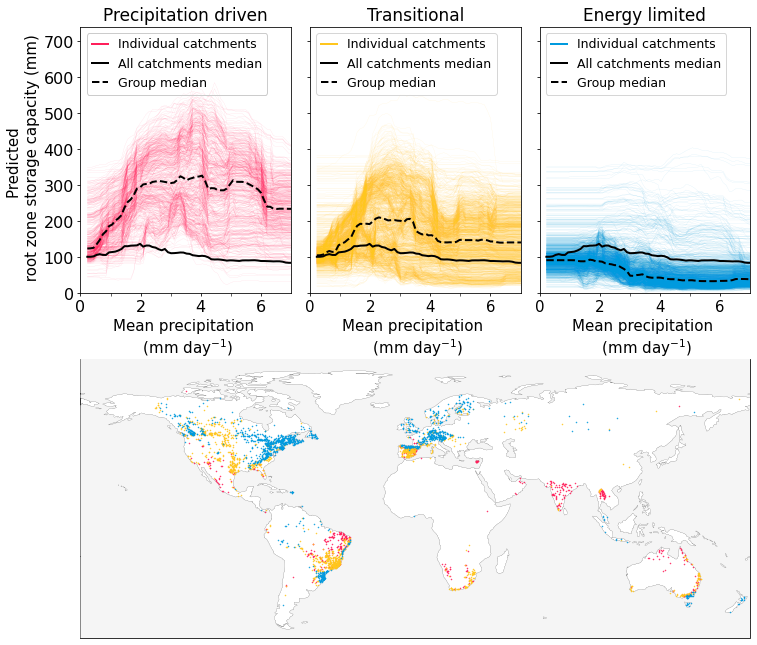

In [69]:
# # figure for presentation
# var = ['t_mean','idu_mean','p_mean','asi']
# var2 = ['$\overline{T}$','$I_\mathrm{ISD}$','$\overline{P}$','$I_\mathrm{AS}$']
# pcavar = ['$\overline{T}$','$I_\mathrm{ISD}$','$\overline{P}$','$I_\mathrm{AS}$','$S_\mathrm{r}$']
# units = ['$\degree$C','d','mm $\mathrm{day}^{-1}$','-']
# major_t = [0,10,20,30]
# minor_t = [-5,5,15,25]
# major_idu = [2,4,6,8,10]
# minor_idu = [3,5,7,9]
# major_p = [0,2,4,6]
# minor_p = [1,3,5]
# major_asi = [0,0.1,0.2,0.3,0.4,0.5]
# minor_asi = [0.05,0.15,0.25,0.35,0.45]
# majors = [major_t,major_idu,major_p,major_asi]
# minors = [minor_t,minor_idu,minor_p,minor_asi]

# xlims = [[-5,30],[2,10],[0,7],[0,0.5]]

# binst = np.arange(-10,32.5,2.5)
# binsidu = np.arange(2,10.5,0.5)
# binsp = np.arange(0,7.5,0.25)
# binsasi = np.arange(0,0.525,0.025)
# binslist = [binst,binsidu,binsp,binsasi]

# m=2
# k=2
# grs1=[]
# grs2=[]
# grs3=[]
# grs4=[]
# fig = plt.figure(figsize=(12,14))
# gs = fig.add_gridspec(ncols=3, nrows=2,height_ratios=[2.3,5],width_ratios=[1,1,1])
# ax1 = fig.add_subplot(gs[0, 0])
# ax3 = fig.add_subplot(gs[0, 1])
# ax7 = fig.add_subplot(gs[0, 2])
# ax6 = fig.add_subplot(gs[1,:],projection=ccrs.PlateCarree())

# ax1.set_title(f'Precipitation driven',size=17, loc='center')
# ax1.set_ylabel('Predicted \n root zone storage capacity (mm)',size=15)
# ax1.set_ylim(0,740)
# ax1.tick_params(axis='both', labelsize=15)  
# ax1.set_xlim(xlims[m])
# ax1.set_xlabel(f'Mean precipitation \n ({units[m]})',size=15)
# ax1.tick_params(axis='both',labelsize=16)
# ax1.tick_params(which='major', length=3)
# ax1.tick_params(which='minor', length=3)
# ax1.set_xticks(ticks=majors[k])
# ax1.set_xticks(ticks=minors[k],minor=True)
# ax1.set_yticks([0,100,200,300,400,500,600,700])
# ax1.set_yticklabels(['','','','','','','',''])
# ax1.set_yticklabels(['0','100','200','300','400','500','600','700'])

# ax3.set_title(f'Transitional',size=17, loc='center')
# ax3.set_xlabel(f'Mean precipitation \n ({units[m]})',size=15)
# ax3.set_ylim(0,740)
# ax3.tick_params(axis='both', labelsize=15)  
# ax3.set_xlim(xlims[m])
# ax3.tick_params(axis='both',labelsize=16)
# ax3.tick_params(which='major', length=3)
# ax3.tick_params(which='minor', length=3)
# ax3.set_xticks(ticks=majors[k])
# ax3.set_xticks(ticks=minors[k],minor=True)
# ax3.tick_params(axis='both', labelsize=15)
# ax3.set_yticks([0,100,200,300,400,500,600,700])
# ax3.set_yticklabels(['','','','','','','',''])

# ax7.set_title(f'Energy limited',size=17, loc='center')
# ax7.set_xlabel(f'Mean precipitation \n ({units[m]})',size=15)
# ax7.set_ylim(0,740)
# ax7.tick_params(axis='both', labelsize=15)  
# ax7.set_xlim(xlims[m])
# ax7.tick_params(axis='both',labelsize=16)
# ax7.tick_params(which='major', length=3)
# ax7.tick_params(which='minor', length=3)
# ax7.set_xticks(ticks=majors[k])
# ax7.set_xticks(ticks=minors[k],minor=True)
# ax7.tick_params(axis='both', labelsize=15)
# ax7.set_yticks([0,100,200,300,400,500,600,700])
# ax7.set_yticklabels(['','','','','','','',''])

# ax6.coastlines(linewidth=0.1)
# ax6.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
# ax6.set_global()
# ax6.set_xlim(-180,180)
# ax6.set_ylim(-60,90)
# # ax6.text(-178,93, f'(d)',zorder=101,size=15)
    
# plt.subplots_adjust(wspace=0.09,hspace=-0.2)
# ice_p = icsi[m]

# # define groups
# pos = []
# neg = []
# slp = (ice_p.iloc[:,-1] - ice_p.iloc[:,0])/(ice_p.columns[-1] - ice_p.columns[0])
# for i in ice_p.index:
#     if (slp.loc[i]>0):
#         pos.append(i)
#     if (slp.loc[i]<0):
#         neg.append(i)

# pm = slp.loc[pos].mean()
# nm = slp.loc[neg].mean()
# p1 = slp[slp>pm].index
# p2 = slp[slp<pm].index

# p = ice_p.index
# p1 = []
# p2 = []
# p3 = []
# p4 = []
# grr = []
# r = []
# rr = []

# for i in p:
#     if ((ice_p.loc[i].idxmax()>3.2)&((ice_p.loc[i].iloc[30] - ice_p.loc[i].iloc[0])/(ice_p.columns[30] - ice_p.columns[0]) > 20)&(ice_p.loc[i].iloc[0]>20)):
#         p1.append(i)
#     else:
#         if ((ice_p.loc[i].idxmax()>1.2)&((ice_p.loc[i].iloc[23] - ice_p.loc[i].iloc[0])/(ice_p.columns[23] - ice_p.columns[0]) > 6)):
#             p2.append(i)
#         else:
#             if ((ice_p.loc[i].iloc[12] - ice_p.loc[i].iloc[0])/(ice_p.columns[12] - ice_p.columns[0]) > 8):
#                 p2.append(i)
#             else:
#                 p3.append(i)
# gr1 = p1
# gr2 = p2
# gr3 = p3
# ice = ice_p
# ylim = 200
# mm = 0
# grs1.append(gr1)
# grs2.append(gr2)
# grs3.append(gr3)
# if (len(gr1)>0):
#     gr = gr1
#     j = 0
#     for i in gr:
#         ax1.plot(ice.columns.values, ice.loc[i],color=c1,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
#     ax1.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
#     ax1.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

# if (len(gr2)>0):
#     gr = gr2
#     j = 1
#     for i in gr:
#         ax3.plot(ice.columns.values, ice.loc[i],color=c4,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
#     ax3.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
#     ax3.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

# if (len(gr3)>0):
#     gr = gr3
#     j = 2
#     for i in gr:
#         ax7.plot(ice.columns.values, ice.loc[i],color=c2,linestyle='-',linewidth=0.08,alpha=0.5,zorder=1)
#     ax7.plot(ice.columns.values, ice.loc[gr].median(),color='k',linestyle='--',linewidth=2,zorder=2)
#     ax7.plot(ice.columns.values, ice.median(),color='k',linestyle='-',linewidth=2,zorder=2)

# ddf = df.loc[ice.index]
# ax6.plot(ddf.loc[gr1].lon, ddf.loc[gr1].lat,'o', markeredgecolor=c1, markerfacecolor=c1,markersize=0.5,zorder=102)
# ax6.plot(ddf.loc[gr2].lon, ddf.loc[gr2].lat,'o', markeredgecolor=c4, markerfacecolor=c4,markersize=0.5,zorder=102)
# ax6.plot(ddf.loc[gr3].lon, ddf.loc[gr3].lat,'o', markeredgecolor=c2, markerfacecolor=c2,markersize=0.5,zorder=102)

# ax1.plot([-1,-1],[-4,-4],color=c1,linestyle='-',linewidth=2, label='Individual catchments')
# ax1.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
# ax1.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')
# ax3.plot([-1,-1],[-4,-4],color=c4,linestyle='-',linewidth=2, label='Individual catchments')
# ax3.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
# ax3.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')
# ax7.plot([-1,-1],[-4,-4],color=c2,linestyle='-',linewidth=2, label='Individual catchments')
# ax7.plot([-1,-1],[-4,-4],color='k',linestyle='-',linewidth=2, label='All catchments median')
# ax7.plot([-1,-1],[-4,-4],color='k',linestyle='--',linewidth=2, label='Group median')

# legend=ax1.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
# legend.get_frame().set_alpha(None)
# legend.get_frame().set_facecolor((1, 1, 1, 0))
# ax3.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
# ax7.legend(loc='upper left',fontsize=12.5,handlelength=1.3)
# # fig.savefig(f'{work_dir}/output/regression/figures/interpretation/ice_splitted_{var[m]}_3splitsv2.jpg',bbox_inches='tight',dpi=300)
# fig.savefig(f'{fig_dir}/fig05_presentation.jpg',bbox_inches='tight',dpi=300)

In [39]:
# get other catchment characterstics for regimes
def f(gr):
    d = pd.DataFrame(index=['mean','median','std','q25','q75'], columns=['t_mean','idu_mean','asi','tc','p_mean','sr_20'])
    dd = df.loc[gr]
    d.loc['mean'] = np.round([dd.t_mean.mean(), dd.idu_mean.mean(), dd.asi.mean(), dd.tc.mean(), dd.p_mean.mean(), dd.sr_20.mean()],2)
    d.loc['median'] = np.round([dd.t_mean.median(), dd.idu_mean.median(), dd.asi.median(), dd.tc.median(), dd.p_mean.median(), dd.sr_20.median()],2)
    d.loc['std'] = np.round([dd.t_mean.std(), dd.idu_mean.std(), dd.asi.std(), dd.tc.std(), dd.p_mean.std(), dd.sr_20.std()],2)
    d.loc['q25'] = np.round([dd.t_mean.quantile(0.25), dd.idu_mean.quantile(0.25), dd.asi.quantile(0.25), dd.tc.quantile(0.25), dd.p_mean.quantile(0.25), dd.sr_20.quantile(0.25)],2)
    d.loc['q75'] = np.round([dd.t_mean.quantile(0.75), dd.idu_mean.quantile(0.75), dd.asi.quantile(0.75), dd.tc.quantile(0.75), dd.p_mean.quantile(0.75), dd.sr_20.quantile(0.75)],2)
    return d

In [40]:
f(gr1)

t_mean idu_mean   asi    tc p_mean   sr_20
mean    21.49     9.52  0.17  0.17   2.79  274.41
median  23.77     7.12  0.15  0.15   2.66  258.34
std       5.9     8.01  0.13   0.1   1.41  140.55
q25     17.87     5.52  0.08  0.09   1.82  170.86
q75     26.03    10.47  0.24  0.24   3.73  369.31

In [41]:
f(gr2)

t_mean idu_mean   asi    tc p_mean   sr_20
mean    14.45     5.57  0.12  0.22   2.67  192.79
median   15.3     5.18  0.06  0.18   2.44  191.19
std      7.65     1.93  0.15  0.14   1.25  104.21
q25      8.96     4.39   0.0   0.1    1.6  113.86
q75     20.88     6.52   0.2  0.31   3.69   259.6

In [42]:
f(gr3)

t_mean idu_mean   asi    tc p_mean  sr_20
mean     8.26     3.41  0.12  0.41   3.12  69.11
median   7.76     3.36  0.11  0.43   3.01  55.08
std      6.49      0.7  0.09  0.12   1.18  61.05
q25      4.06     2.92  0.05  0.33   2.36  26.44
q75     10.76     3.81  0.18  0.51   3.64  94.71

## TC CLASSIFICATION

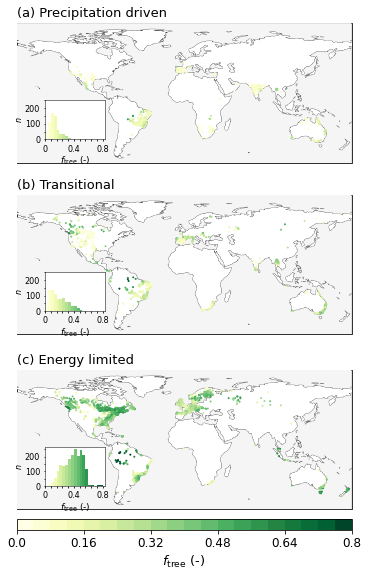

In [146]:
# group by treecover
cmap = ListedColormap([c1,c4,c2])
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_v2.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
features = ['t_mean','idu_mean','p_mean','asi','sr_20','tc']
df1 = df.loc[list(itertools.chain.from_iterable(grs1))] 
df2 = df.loc[list(itertools.chain.from_iterable(grs2))] 
df3 = df.loc[list(itertools.chain.from_iterable(grs3))]

bounds = np.linspace(0,0.8,21)
bounds2 = np.linspace(0,0.8,6)

n1 = []
n2 = []
n3 = []
for i in range(len(bounds)):
    if (i<(len(bounds)-1)):
        nn1 = len(df1[(df1.tc<bounds[i+1])&(df1.tc>=bounds[i])])
        n1.append(nn1)
        nn2 = len(df2[(df2.tc<bounds[i+1])&(df2.tc>=bounds[i])])
        n2.append(nn2)
        nn3 = len(df3[(df3.tc<bounds[i+1])&(df3.tc>=bounds[i])])
        n3.append(nn3)
    else:
        nn1 = len(df1[(df1.tc>=bounds[i])])
        n1.append(nn1)
        nn2 = len(df2[(df2.tc>=bounds[i])])
        n2.append(nn2)
        nn3 = len(df3[(df3.tc>=bounds[i])])
        n3.append(nn3)


cmap_ylgn = cm.get_cmap('YlGn',21)
norm = mpl.colors.BoundaryNorm(bounds, cmap_ylgn.N)

colors=[]
for i in range(len(bounds)):
    colors.append(cmap_ylgn(i)) 


fig = plt.figure(figsize=(6,15))
gs = fig.add_gridspec(ncols=1, nrows=3,height_ratios=[1,1,0.74])
ax1 = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[1, 0],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[2, 0],projection=ccrs.PlateCarree())
plt.subplots_adjust(hspace=-0.8)

# RED
# ax = fig.add_subplot(311,projection=ccrs.PlateCarree())
ax = ax1
ax.coastlines(linewidth=0.3)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df1.lon,df1.lat,c=df1['tc'],s=1,cmap=cmap_ylgn, norm=norm,zorder=101)
# cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither',aspect=30, pad=0.02, norm=norm,ticks=bounds2)
# cbar.set_ticklabels(bounds2,size=12)
# cbar.set_label('$f_\mathrm{tree}$ (-)',size=13)
ax.set_title('(a) Precipitation driven',size=13,loc='left')

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.07,0.13,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins=bounds
iax.bar(np.arange(0,21,1),n1,width=1,color=colors)
iax.set_xticks(np.arange(-0.5,20,2))
iax.set_xticklabels(['0','','','','','0.4','','','','','0.8'])
iax.set_xlim(-0.5,20.5)
iax.set_yticks([0,50,100,150,200,250])
iax.set_yticklabels(['0','','100','','200',''])
iax.set_xlabel('$f_\mathrm{tree}$ (-)',size=9,labelpad=1)
iax.set_ylabel('$n$',size=8,labelpad=1)
iax.tick_params(axis='both',length=1.5, labelsize=8)

# Yellow
# ax = fig.add_subplot(312,projection=ccrs.PlateCarree())
ax = ax2
ax.coastlines(linewidth=0.3)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df2.lon,df2.lat,c=df2['tc'],s=1,cmap=cmap_ylgn, norm=norm,zorder=101)
# cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither',aspect=30, pad=0.02, norm=norm,ticks=bounds2)
# cbar.set_ticklabels(bounds2,size=12)
# cbar.set_label('$f_\mathrm{tree}$ (-)',size=13)
ax.set_title('(b) Transitional',size=13,loc='left')

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.07,0.13,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins=bounds
iax.bar(np.arange(0,21,1),n2,width=1,color=colors)
iax.set_xticks(np.arange(-0.5,20,2))
iax.set_xticklabels(['0','','','','','0.4','','','','','0.8'])
iax.set_xlim(-0.5,20.5)
iax.set_yticks([0,50,100,150,200,250])
iax.set_yticklabels(['0','','100','','200',''])
iax.set_xlabel('$f_\mathrm{tree}$ (-)',size=9,labelpad=1)
iax.set_ylabel('$n$',size=8,labelpad=1)
iax.tick_params(axis='both',length=1.5, labelsize=8)

# BLUE
# ax = fig.add_subplot(313,projection=ccrs.PlateCarree())
ax = ax3
ax.coastlines(linewidth=0.3)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df3.lon,df3.lat,c=df3['tc'],s=1,cmap=cmap_ylgn, norm=norm,zorder=101)
cbar = plt.colorbar(s, ax=ax, orientation='horizontal',spacing='proportional',extend='neither',aspect=30, pad=0.02, norm=norm,ticks=bounds2)
cbar.set_ticklabels(bounds2,size=12)
cbar.set_label('$f_\mathrm{tree}$ (-)',size=13)
ax.set_title('(c) Energy limited',size=13,loc='left')

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.07,0.13,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins=bounds
iax.bar(np.arange(0,21,1),n3,width=1,color=colors)
iax.set_xticks(np.arange(-0.5,20,2))
iax.set_xticklabels(['0','','','','','0.4','','','','','0.8'])
iax.set_xlim(-0.5,20.5)
iax.set_yticks([0,50,100,150,200,250])
iax.set_yticklabels(['0','','100','','200',''])
iax.set_xlabel('$f_\mathrm{tree}$ (-)',size=9,labelpad=1)
iax.set_ylabel('$n$',size=8,labelpad=1)
iax.tick_params(axis='both',length=1.5, labelsize=8)
# fig.savefig(f'{work_dir}/output/regression/figures/interpretation/groups_tc_blue.jpg',bbox_inches='tight',dpi=300)
fig.savefig(f'{fig_dir}/fig06.jpg',bbox_inches='tight',dpi=600)